# <font color=red>Tourism Project</font>

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
# import dataset "Tourism.xlsx, sheet name - Tourism"

data=pd.read_excel('Tourism.xlsx',sheet_name='Tourism')

In [3]:
# copying data to another varaible to avoid any changes to original data


df1 = data.copy()

## <font color=green>**STRUCTURE OF THE DATA**</font>

In [4]:
# displays the first 5 rows in dataframe

df1.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


 - There are 20 columns in the data
 - There are categorical and numerical columns

In [5]:
# displays the last 5 rows in dataframe

df1.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [6]:
# determining how many rows and columns in data

df1.shape

(4888, 20)

 - There are 4888 rows and 20 columns in the dataset.

In [7]:
# determining the data types of each individual column

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

 - There are object, float and integer value counts in the dataset.

In [8]:
# List of the object columns in dataframe

cols = df1.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [9]:
# labeling object columns category

for i in cols.columns:
    df1[i] = df1[i].astype('category')

In [10]:
# determining the data types of each individual column

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

 - Object data types have been converted to category

In [11]:
# Transposed summary of data

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


 - DurationOfPitch, NumberOfTrips, and MonthlyIncome are right skewed.  The mean is greater than the median.
 - Age and DurationOfPitch may have possible outliers.
 - Data preprocessing will be required on some of the columns.

## <font color=green>**DATA PRE-PROCESSING**</font>

In [12]:
# Summary of categorical values

df1.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


 - There are some missing values in the category, "TypeofContact"
 - There are 2 unique value counts in TypeofContact, 3 in Gender, 4 in Occupation and MaritalStatus, and 5 in ProductPitched and Designation. 

In [13]:
# creating cols_cat in preperation for unique values in categories 

cols_cat= df1.select_dtypes(['category'])

In [14]:
# checking the unique values in category columns

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executiv

 - Determining unique value counts in the categorical columns.
  - Occupation: Salaried, Small Business, Large Business, Free Lancer.
  - Gender:  Male, Female, Fe Male.
  - ProductPitched:  Basic, Deluxe, Standard, Super Deluxe, King.
  - MaritalStatus:  Married, Divorced, Single, Unmarried.
  - Designation:  Executive, Manager, Senior Manager, AVP, VP.

In [15]:
# determining if any duplicate data found in df1

df1.duplicated().sum()

0

 - There is no duplicate data in the dataset.

### <font color=blue>**Missing Value Treatment**</font>

In [16]:
# determining the missing values found in each individual column

df1.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

 - There are missing values in the following columns:  Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, and MonthlyIncome.

In [17]:
# determining missing values in decending order

df1.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

#### <font color=black>**Median Imputation**</font>

In [18]:
# missing value treatment on column, 'MonthlyIncome'

print(df1["MonthlyIncome"].isnull().sum())
df1["MonthlyIncome"] = df1.groupby(["Gender","Occupation","Designation"])["MonthlyIncome"].apply(lambda x: x.fillna(x.median())
)
df1["MonthlyIncome"].isnull().sum()

233


0

 - There are 233 missing values in the MonthlyIncome column.
 - Imputed the medians of Monthly Income, grouped by Gender, Occupation and Designation.

In [19]:
# filling the missing values in "DurationOfPitch" column with mean value of "DurationOfPitch" column

print(df1["DurationOfPitch"].isnull().sum())
df1["DurationOfPitch"].fillna(df1["DurationOfPitch"].median(), inplace=True)  # median imputation
df1["DurationOfPitch"].isnull().sum()

251


0

 - There are 251 missing values in the DurationOfPitch column.
 - Imputed the median to fill missing values.

In [20]:
# filling the missing values in "Age" column with mean value of "Age" column

print(df1["Age"].isnull().sum())
df1["Age"].fillna(df1["Age"].median(), inplace=True)  # median imputation
df1["Age"].isnull().sum()

226


0

 - There are 226 missing values in the Age column.
 - Imputed the median to fill missing values.

In [21]:
# filling the missing values in "NumberOfTrips" column with mean value of "NumberOfTrips" column

print(df1["NumberOfTrips"].isnull().sum())
df1["NumberOfTrips"].fillna(df1["NumberOfTrips"].median(), inplace=True)  # median imputation
df1["NumberOfTrips"].isnull().sum()

140


0

 - There are 140 missing values in the NumberOfTrips column.
 - Imputed the median to fill missing values.

In [22]:
# filling the missing values in "NumberOfChildrenVisiting" column with mean value of "NumberOfChildrenVisiting" column

print(df1["NumberOfChildrenVisiting"].isnull().sum())
df1["NumberOfChildrenVisiting"].fillna(df1["NumberOfChildrenVisiting"].median(), inplace=True)  # median imputation
df1["NumberOfChildrenVisiting"].isnull().sum()

66


0

 - There are 66 missing values in the NumberOfChildrenVisiting column.
 - Imputed the median to fill missing values.

In [23]:
# filling the missing values in "NumberOfFollowups" column with mean value of "NumberOfFollowups" column

print(df1["NumberOfFollowups"].isnull().sum())
df1["NumberOfFollowups"].fillna(df1["NumberOfFollowups"].median(), inplace=True)  # median imputation
df1["NumberOfFollowups"].isnull().sum()

45


0

 - There are 45 missing values in the NumberOfFollowups column.
 - Imputed the median to fill missing values.

In [24]:
# filling the missing values in "PreferredPropertyStar" column with mean value of "PreferredPropertyStar" column

print(df1["PreferredPropertyStar"].isnull().sum())
df1["PreferredPropertyStar"].fillna(df1["PreferredPropertyStar"].median(), inplace=True)  # median imputation
df1["PreferredPropertyStar"].isnull().sum()

26


0

 - There are 26 missing values in the PreferredPropertyStar column.
 - Imputed the median to fill missing values.

In [25]:
# dropping the missing values in "TypeofContact"

df1.dropna(subset=["TypeofContact"], inplace=True)

 - Dropped the rows with missing values in the column, "TypeofContact".

### <font color=blue>**Value Count Treatment**</font>

In [26]:
# this loop prints the names of the columns where there is
# at least one entry ending with the characters 'Fe Male'

gender_cols = []
for colname in df1.columns[
    df1.dtypes == "category"
]:  # only need to consider string columns
    if (
        df1[colname].str.endswith("Fe Male").any()
    ):  # using `.str` so I can use an element-wise string method
        gender_cols.append(colname)
print(gender_cols)

['Gender']


 - Created a loop to determine the value counts that start with "Fe Male" in the column "Gender".

In [27]:
# this loop is determining which columns starts with 'Fe Male'

gender_cols_null = []
for colname in df1.columns[
    df1.dtypes == "category"
]:  # only need to consider string columns
    if (
        df1[colname].str.startswith("Fe Male").any()
    ):  # using `.str` so I can use an element-wise string method
        gender_cols_null.append(colname)
print(gender_cols_null)

['Gender']


 - Created a loop to determine the value counts that end with "Fe Male" in the column "Gender".

In [28]:
# replacing "Fe Male" value count with "Female" in "Gender" category

def gender_to_str(gender_val):
    if isinstance(gender_val, str):
        return str(gender_val.replace("Fe Male", "Female"))


for colname in gender_cols:
    df1[colname] = df1[colname].apply(gender_to_str)

df1[gender_cols].head()

,Gender
0,Female
1,Male
2,Male
3,Female
4,Male


 - Replacing all the value counts, "Fe Male" with "Female" and printing head.

In [29]:
# confirming value counts in "Gender" category

df1["Gender"].value_counts()

Male      2901
Female    1962
Name: Gender, dtype: int64

 - Confirming that the value count treatment processed correctly.

In [30]:
# this loop prints the names of the columns where there is
# at least one entry ending with the characters 'Unmarried'

MaritalStatus_cols = []
for colname in df1.columns[
    df1.dtypes == "category"
]:  # only need to consider string columns
    if (
        df1[colname].str.endswith("Unmarried").any()
    ):  # using `.str` so I can use an element-wise string method
        MaritalStatus_cols.append(colname)
print(MaritalStatus_cols)

['MaritalStatus']


 - Created a loop to determine the value counts that end with "Unmarried" in the column "MaritalStatus".

In [31]:
# replacing "Unmarried" value count with "Single" in "MaritalStatus" category

def MaritalStatus_to_str(MaritalStatus_val):
    if isinstance(MaritalStatus_val, str):
        return str(MaritalStatus_val.replace("Unmarried", "Single"))


for colname in MaritalStatus_cols:
    df1[colname] = df1[colname].apply(MaritalStatus_to_str)

df1[MaritalStatus_cols].head()

,MaritalStatus
0,Single
1,Divorced
2,Single
3,Divorced
4,Divorced


 - Replacing all the value counts, "Unmarried" with "Single" and printing head.

In [32]:
# confirming value counts in "MaritalStatus" category

df1["MaritalStatus"].value_counts()

Married     2325
Single      1594
Divorced     944
Name: MaritalStatus, dtype: int64

 - The unmarried value counts are now added to the single value count.

### <font color=blue>**Dropping Inessential Column**</font>

In [33]:
# Dropping column "CustomerID" as pandas indexing is appropriate

df1.drop(['CustomerID'],axis=1,inplace=True)

 - This column does not add value to our model.  Pandas indexing is appropriate.

In [34]:
# determining missing values in decending order

df1.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

 - There are no longer missing values found within the dataset.

## <font color=green>**Exploratory Data Analysis**</font>

### <font color=blue>**Univariate Analysis**</font>

In [35]:
# Function to create histogram_boxplot

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [36]:
# determining the data types of each individual column

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4863 non-null   int64   
 1   Age                       4863 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4863 non-null   int64   
 4   DurationOfPitch           4863 non-null   float64 
 5   Occupation                4863 non-null   category
 6   Gender                    4863 non-null   object  
 7   NumberOfPersonVisiting    4863 non-null   int64   
 8   NumberOfFollowups         4863 non-null   float64 
 9   ProductPitched            4863 non-null   category
 10  PreferredPropertyStar     4863 non-null   float64 
 11  MaritalStatus             4863 non-null   object  
 12  NumberOfTrips             4863 non-null   float64 
 13  Passport                  4863 non-null   int64 

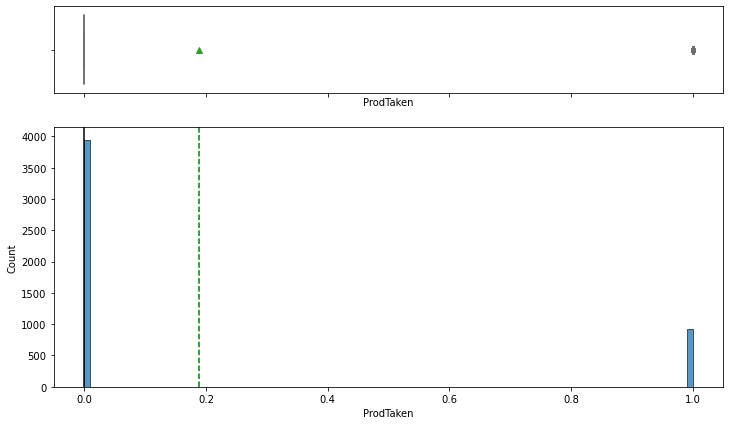

In [37]:
# creating histogram and box plot of df1 numerical column "ProdTaken"

histogram_boxplot(df1, "ProdTaken", bins=100)

 - Visual interpretation shows a possible outlier that must be investigated.
 - Most customers did not purchase the travel package.

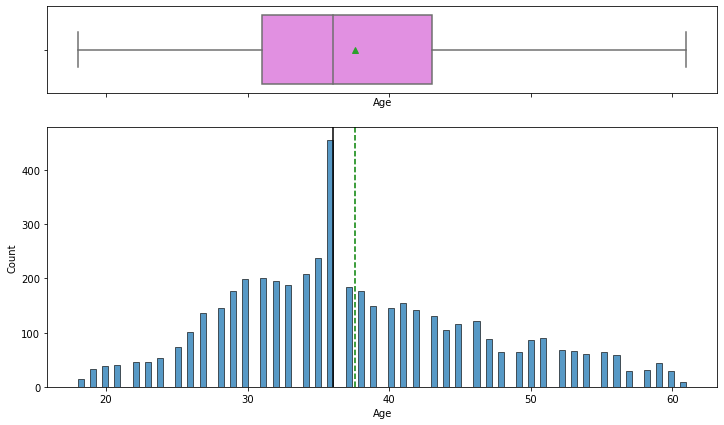

In [38]:
# creating histogram and box plot of df1 numerical column "Age"

histogram_boxplot(df1, "Age", bins=100)

 - There are no outliers.
 - Age is evenly distributed.

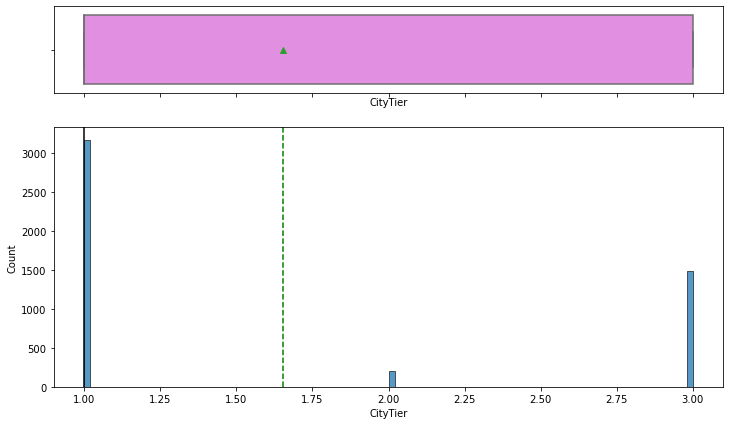

In [39]:
# creating histogram and box plot of df1 numerical column "CityTier"

histogram_boxplot(df1, "CityTier", bins=100)

 - There are no outliers.
 - CityTier column has 3 values.

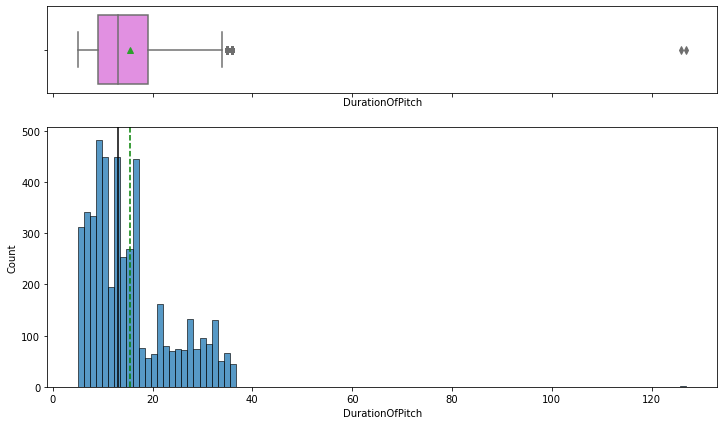

In [40]:
# creating histogram and box plot of df1 numerical column "DurationOfPitch"

histogram_boxplot(df1, "DurationOfPitch", bins=100)

 - DurationOfPitch has possible outliers that need investigation.
 - The graph is right skewed.

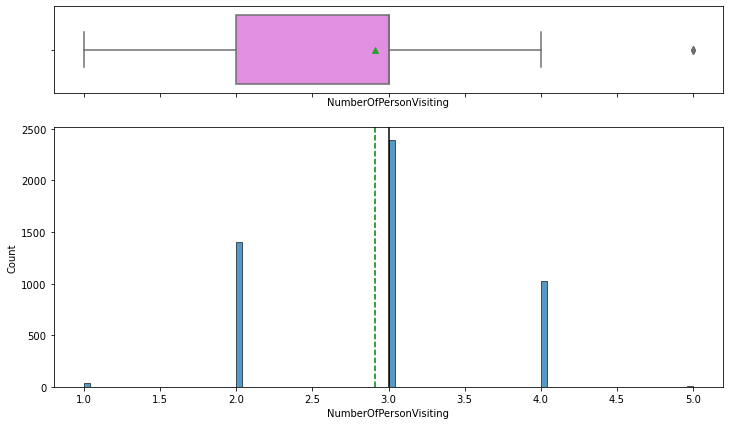

In [41]:
# creating histogram and box plot of df1 numerical column "NumberOfPersonVisiting"

histogram_boxplot(df1, "NumberOfPersonVisiting", bins=100)

 - NumberOfPersonVisiting has possible outliers that need investigation.
 - There seems to be 3 value counts in the column with the median being 3 and the mean slightly less than 3.

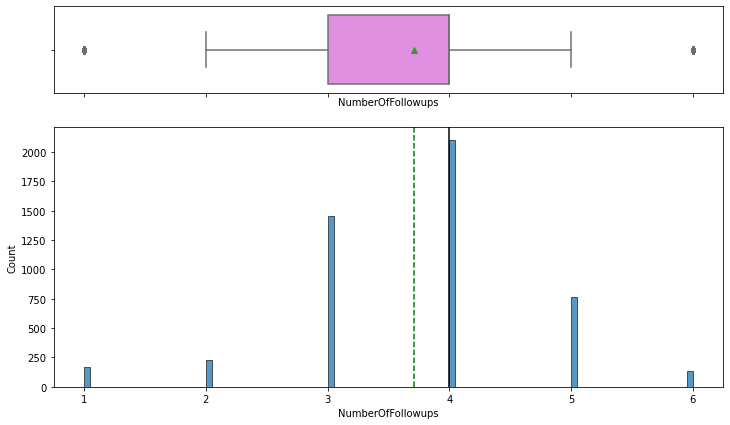

In [42]:
# creating histogram and box plot of df1 numerical column "NumberOfFollowups"

histogram_boxplot(df1, "NumberOfFollowups", bins=100)

 - There are possible outliers in NumberOfFollowUps which requires investigation.
 - There are 6 possible value counts in the column with the median being 4.

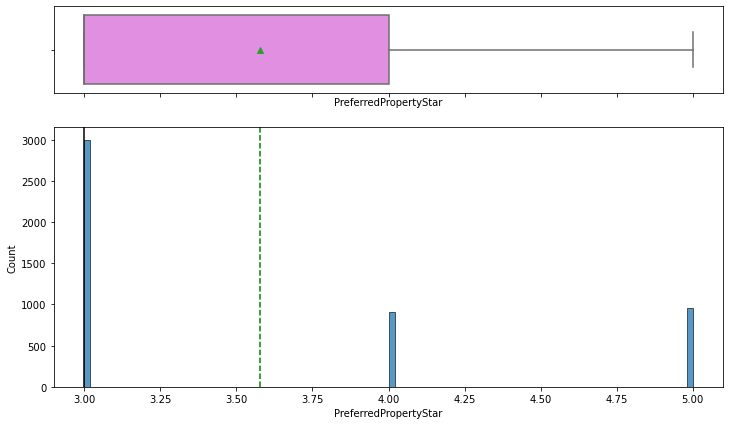

In [43]:
# creating histogram and box plot of df1 numerical column "PreferredPropertyStar"

histogram_boxplot(df1, "PreferredPropertyStar", bins=100)

 - There are no outliers.
 - There are 3 value counts.  The median is 3 and the mean is around 3.6.

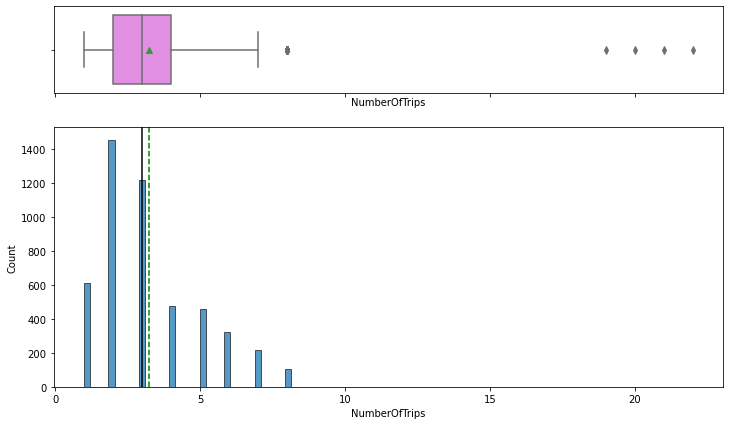

In [44]:
# creating histogram and box plot of df1 numerical column "NumberOfTrips"

histogram_boxplot(df1, "NumberOfTrips", bins=100)

 - There are possible outliers which need to be addressed in NumberOfTrips.
 - The graph is right skewed.
 - The mean and median are similar around 3.

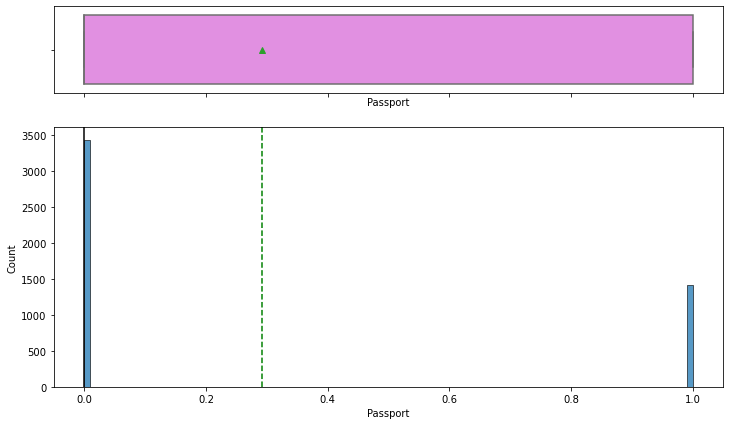

In [45]:
# creating histogram and box plot of df1 numerical column "Passport"

histogram_boxplot(df1, "Passport", bins=100)

 - There are no outliers.
 - There are 2 value counts in the column Passport.
 - the median is 0 and the mean is around .3.

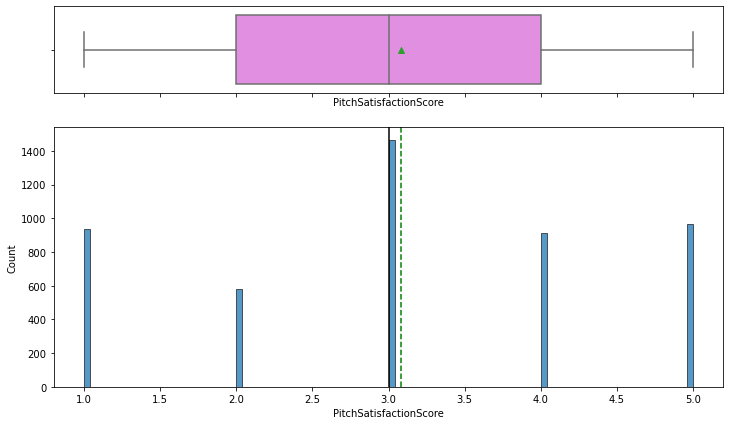

In [46]:
# creating histogram and box plot of df1 numerical column "PitchSatisfactionScore"

histogram_boxplot(df1, "PitchSatisfactionScore", bins=100)

 - There are no outliers in PitchSatisfactionScore.
 - There are 5 value counts in the column.
 - The mean and median are around 3.

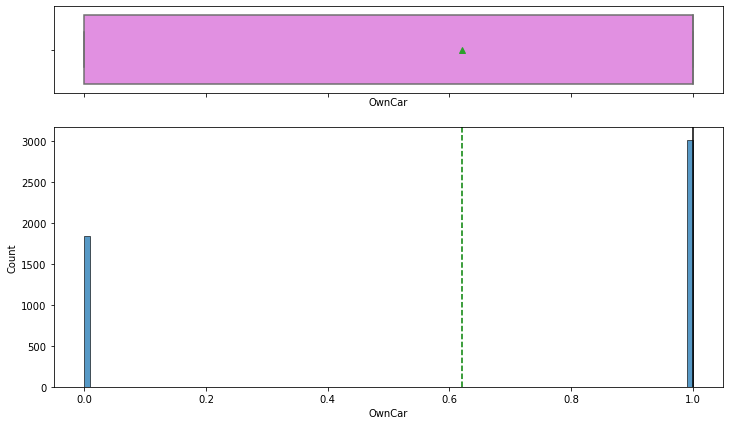

In [47]:
# creating histogram and box plot of df1 numerical column "OwnCar"

histogram_boxplot(df1, "OwnCar", bins=100)

 - There are no outliers in OwnCar.
 - There are two value counts in the column.
 - The median is 1 and the mean is slightly greater the 0.6.

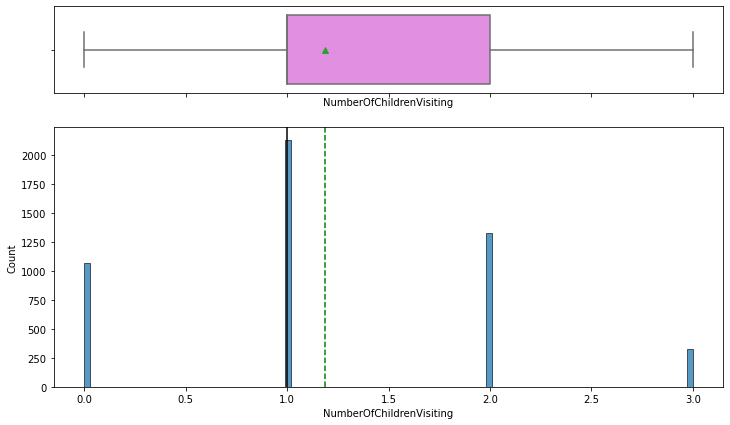

In [48]:
# creating histogram and box plot of df1 numerical column "NumberOfChildrenVisiting"

histogram_boxplot(df1, "NumberOfChildrenVisiting", bins=100)

 - There are no outliers in NumberOfChildrenVisiting.
 - There are 4 value counts in the category.
 - The median is 1.

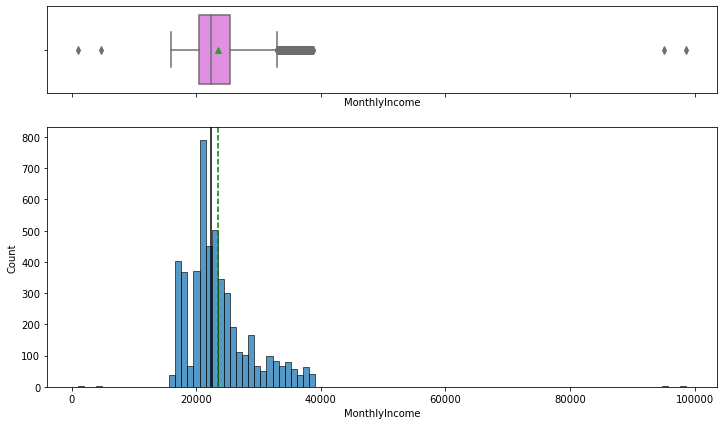

In [49]:
# creating histogram and box plot of df1 numerical column "MonthlyIncome"

histogram_boxplot(df1, "MonthlyIncome", bins=100)

 - There are outliers found in MonthlyIncome.
 - The graph is right skewed.
 - The median is around 25000 and the mean is slightly greater.

In [50]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

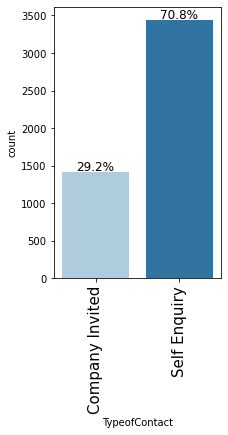

In [51]:
# creating barplot of df1 catergory "TypeofContact"

labeled_barplot(df1, "TypeofContact", perc=True)

 - 70.8% of the customers were of the self enquiry type of contact and the remaining were company invited.

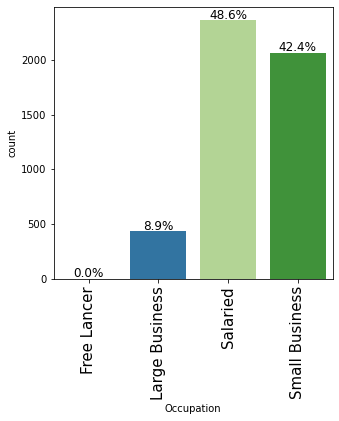

In [52]:
# creating barplot of df1 catergory "Occupation"

labeled_barplot(df1, "Occupation", perc=True)

 - 8.9% of the customers were large business, 48.6% salaried, and 42.4% small business.
 - None were of the free lancer variety.

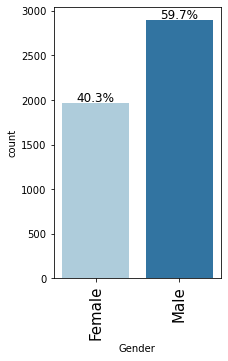

In [53]:
# creating barplot of df1 catergory "Gender"

labeled_barplot(df1, "Gender", perc=True)

 - 59.7% of the customers were male and the remainder female.

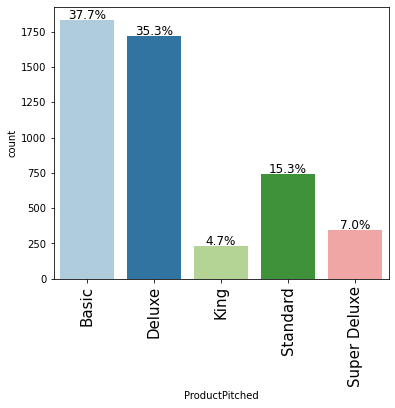

In [54]:
# creating barplot of df1 catergory "ProductPitched"

labeled_barplot(df1, "ProductPitched", perc=True)

 - Basic was the most common product pitched at 37.7%, followed by Deluxe 35.3%, Standard 15.3%, Super Deluxe 7.0%, and King 4.7%.

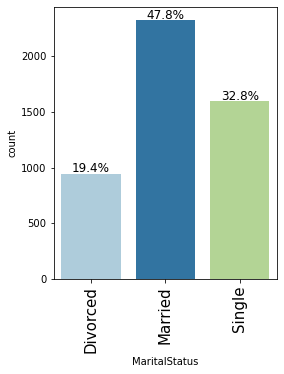

In [55]:
# creating barplot of df1 catergory "MaritalStatus"

labeled_barplot(df1, "MaritalStatus", perc=True)

 - Almost half of the customers were married 47.8%, 32.8% Single, and 19.4% Divorced.

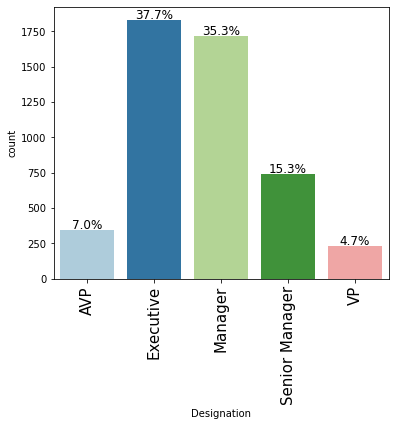

In [56]:
# creating barplot of df1 catergory "Designation"

labeled_barplot(df1, "Designation", perc=True)

 - Executive and Manager make up the highest designation within the current organization.  
 - VP and AP the two lowest designations within the organization.

### <font color=blue>**Bivariate Analysis**</font>

#### <font color=black>**Correlation Chart**</font>

In [57]:
# correlation between numerical columns

correlation = df1.corr()
correlation

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.144595,0.087184,0.076383,0.008915,0.111774,0.098548,0.016980,0.261027,0.051952,-0.012020,0.007920,-0.128164
Age,-0.144595,1.000000,-0.013939,-0.007480,0.015079,-0.000581,-0.018227,0.174974,0.029805,0.016687,0.047458,0.005707,0.460827
CityTier,0.087184,-0.013939,1.000000,0.019478,-0.002017,0.024576,-0.010499,-0.028335,0.001749,-0.041260,0.005196,0.000421,0.055337
DurationOfPitch,0.076383,-0.007480,0.019478,1.000000,0.072196,0.014951,-0.005711,0.013944,0.032632,-0.002856,-0.002694,0.037218,0.003399
NumberOfPersonVisiting,0.008915,0.015079,-0.002017,0.072196,1.000000,0.325170,0.030504,0.189400,0.008551,-0.019195,0.010181,0.606655,0.201073
NumberOfFollowups,0.111774,-0.000581,0.024576,0.014951,0.325170,1.000000,-0.028840,0.136057,0.003005,0.004219,0.010685,0.282781,0.176787
PreferredPropertyStar,0.098548,-0.018227,-0.010499,-0.005711,0.030504,-0.028840,1.000000,0.009914,0.000654,-0.022843,0.013093,0.032006,-0.000594
NumberOfTrips,0.016980,0.174974,-0.028335,0.013944,0.189400,0.136057,0.009914,1.000000,0.012412,-0.003925,-0.012832,0.160982,0.116852
Passport,0.261027,0.029805,0.001749,0.032632,0.008551,0.003005,0.000654,0.012412,1.000000,0.002262,-0.022825,0.018051,0.001874
PitchSatisfactionScore,0.051952,0.016687,-0.041260,-0.002856,-0.019195,0.004219,-0.022843,-0.003925,0.002262,1.000000,0.067562,-0.001176,0.027497


#### <font color=black>**Correlation Heatmap**</font>

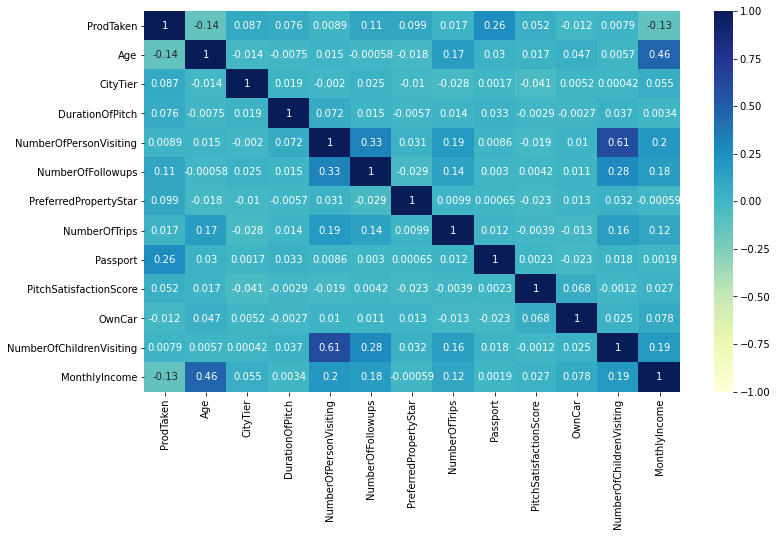

In [58]:
# heatmap that shows correlation between numerical columns

plt.figure(figsize=(12, 7))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.show()

 - There is a high correlation between "NumberOfPersonVisting" and "NumberOfChildrenVisiting".  As one value increases, so will the other.
 - There is a somewhat high correlation between "MonthlyIncome" and "Age".  As one value increases, so will the other.
 - ProdTaken has postive correlation with the following numerical columns:  CityTier, DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, Passport, PitchSatisfactionScore, and NumberOfChildrenVisiting.  As one value increases, so will the other.
 - ProdTaken is most positively correlated with Passport (0.26).
 - ProdTaken has a negative correlation with Age, OwnCar, and MonthlyIncome.  As one value increases, the other will decrease.
 - ProdTaken is most negatively correlated to Age (-0.14)

#### <font color=black>**Pairplot**</font>

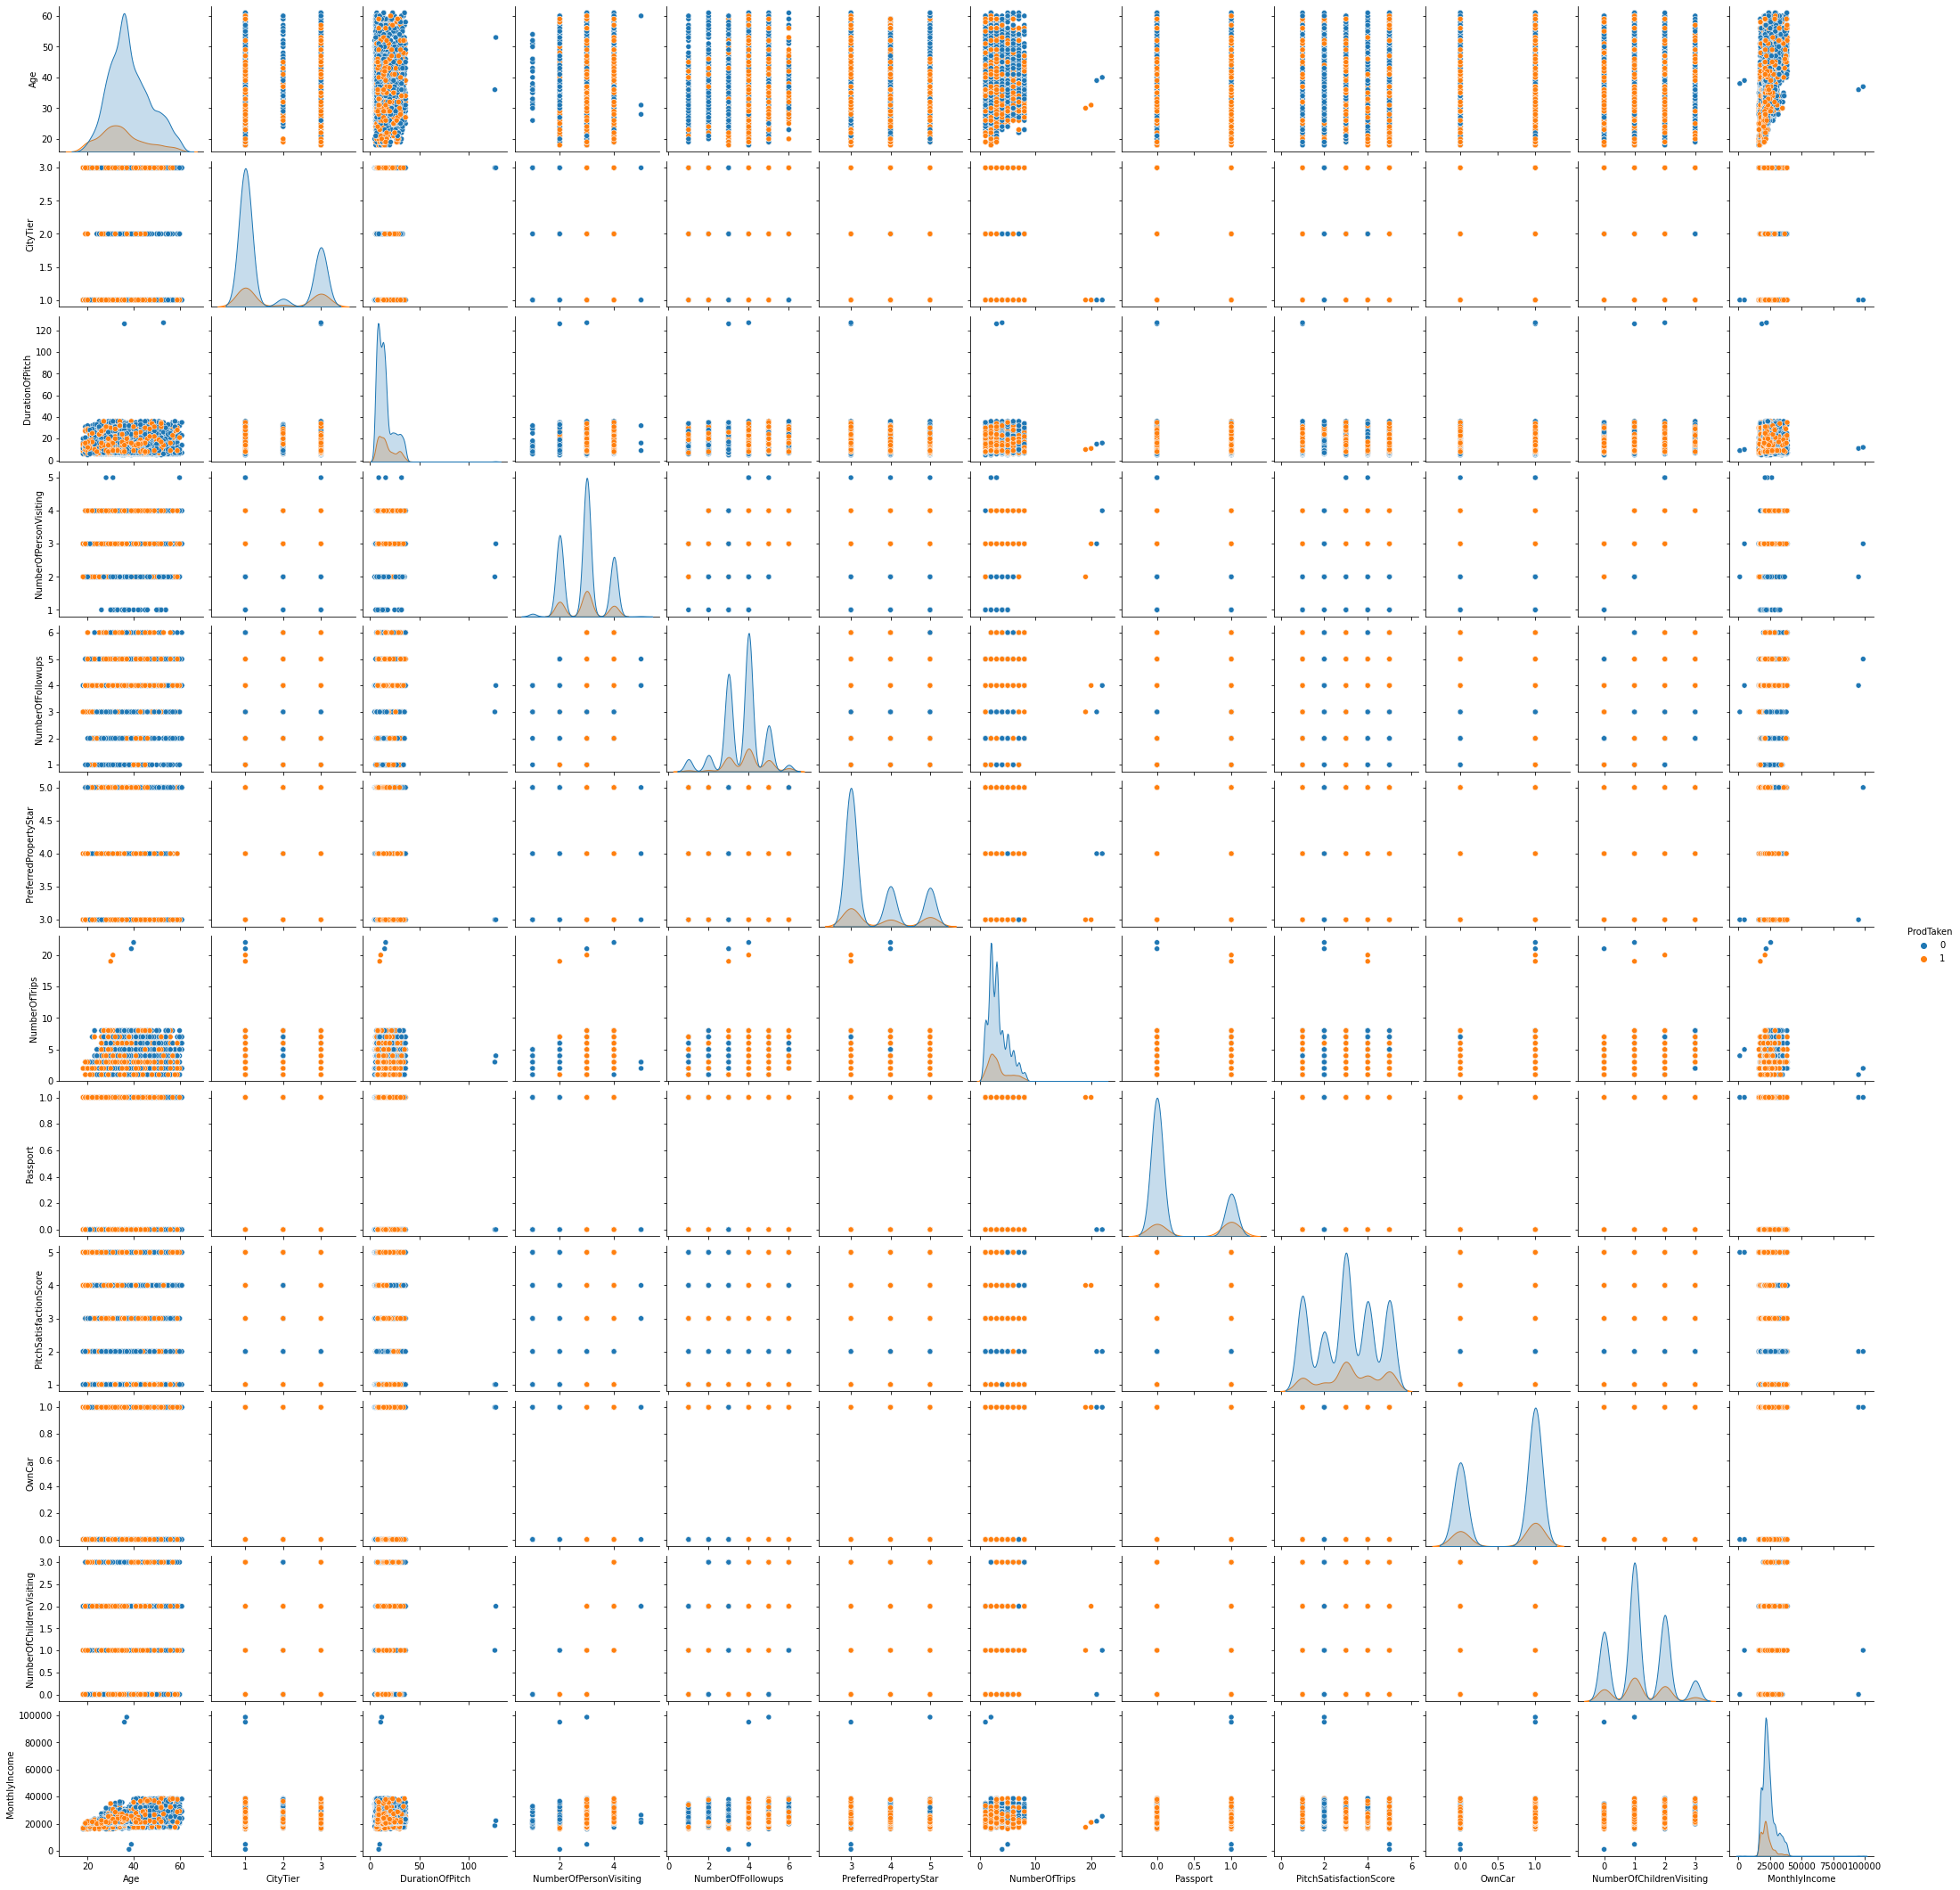

In [59]:
sns.pairplot(df1,hue='ProdTaken')
plt.show()

#### <font color=black>**Stacked Barplot Relating to ProdTaken**</font>

In [60]:
# define stacked barplot for bivariate analysis


def stacked_barplot(df1, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df1[predictor].nunique()
    sorter = df1[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], df1[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df1[predictor], df1[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken     0    1   All
Age                       
All        3764  873  4637
29.0        119   57   176
30.0        151   48   199
34.0        164   44   208
31.0        160   41   201
33.0        148   40   188
32.0        155   40   195
26.0         65   37   102
35.0        203   34   237
27.0        106   30   136
36.0        203   27   230
20.0         13   25    38
41.0        130   24   154
37.0        161   24   185
28.0        121   24   145
40.0        123   23   146
21.0         18   23    41
19.0         11   21    32
42.0        122   20   142
25.0         54   19    73
24.0         35   18    53
45.0         97   18   115
44.0         88   17   105
51.0         73   17    90
38.0        161   15   176
22.0         31   15    46
39.0        136   14   150
52.0         54   14    68
23.0         33   13    46
47.0         76   12    88
56.0         46   12    58
50.0         74   12    86
59.0         32   12    44
58.0         20   11    31
48.0         54   11    65
4

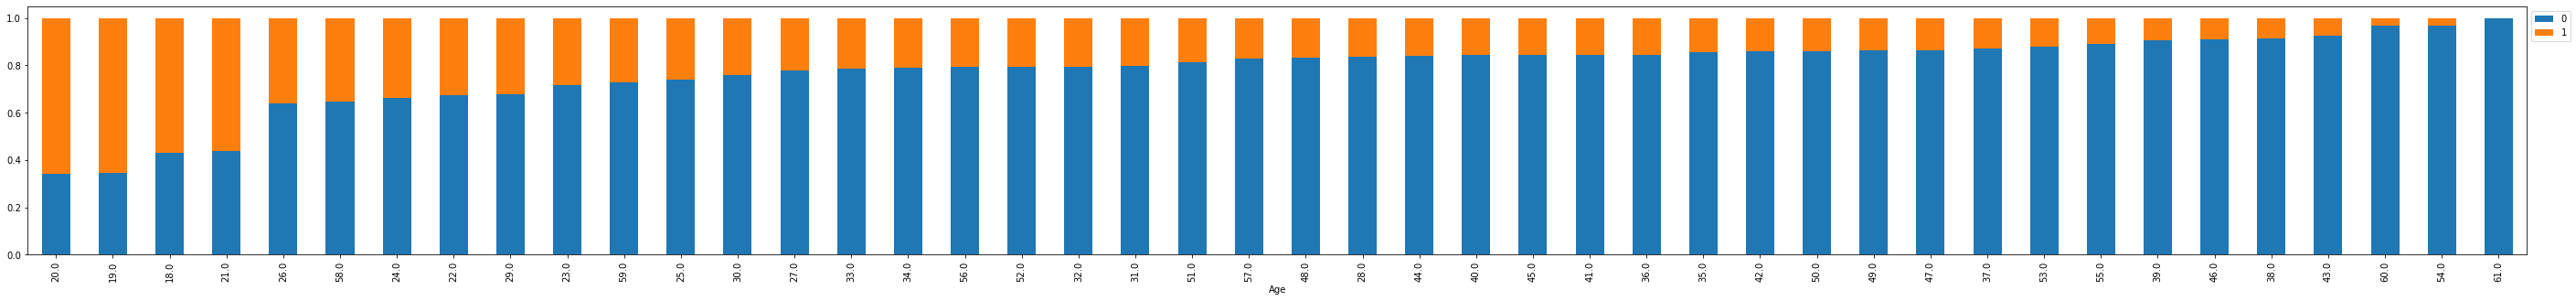

In [61]:
# stacked barplot of Age and ProdTaken

stacked_barplot(df1, "Age", "ProdTaken")

 - Relative to Age, 29 year olds have accepted the most packages (57), followed by 30 year olds (48), 34 year olds (44), and 31 year olds (41).
 - The top 10 Ages of customers accepting the package all fall between the ages of 27 - 36.
 - 61 year olds did not accept the package.

ProdTaken     0    1   All
CityTier                  
All        3946  917  4863
1          2655  518  3173
3          1139  353  1492
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


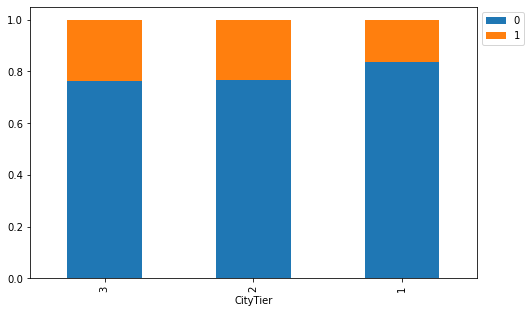

In [62]:
# stacked barplot of CityTier and ProdTaken

stacked_barplot(df1, "CityTier", "ProdTaken")

 - Tier 3 city tier members are most likely to accept the package.  Followed by tier 2 and tier 1, respectively.

ProdTaken           0    1   All
DurationOfPitch                 
All              3762  875  4637
9.0               404   79   483
8.0               273   60   333
16.0              218   56   274
15.0              217   52   269
7.0               294   48   342
10.0              199   45   244
14.0              212   41   253
6.0               268   39   307
11.0              168   37   205
12.0              162   33   195
13.0              191   32   223
31.0               52   31    83
30.0               65   30    95
17.0              148   24   172
22.0               66   23    89
19.0               36   21    57
23.0               58   21    79
29.0               53   21    74
18.0               56   19    75
20.0               46   19    65
28.0               44   17    61
21.0               57   16    73
24.0               54   16    70
32.0               59   15    74
27.0               58   14    72
25.0               59   14    73
26.0               60   12    72
33.0      

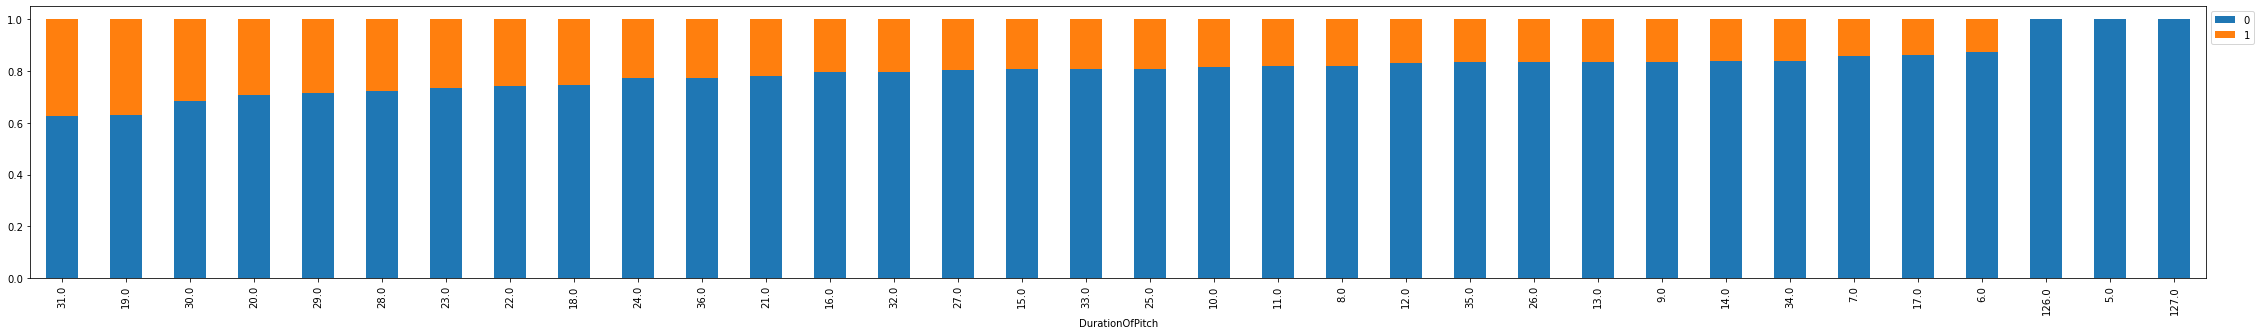

In [63]:
# stacked barplot of DurationOfPitch and ProdTaken

stacked_barplot(df1, "DurationOfPitch", "ProdTaken")

 - A duration of the sales pitch lasting 9 minutes led to the most package sales. However, there are 404, 9 minute values.  The most of any value count.
 - 126, 127, and 5 minute pitches were rendered ineffective with no package purchases.
 - The top 10 durations leading to package purchase are all under 20 minutes.

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3946  917  4863
3                       1935  459  2394
2                       1136  265  1401
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


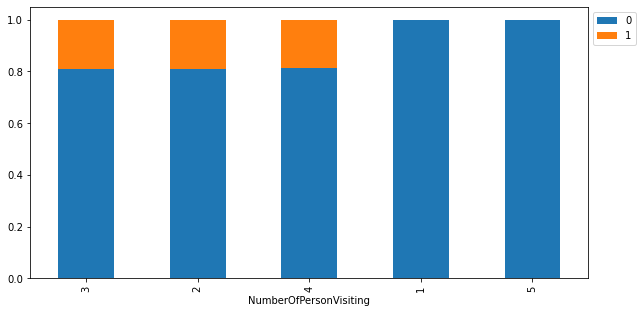

In [64]:
# stacked barplot of NumberOfPersonVisiting and ProdTaken

stacked_barplot(df1, "NumberOfPersonVisiting", "ProdTaken")

 - 3, 2, and 4 persons planning to take the trip with the customer are the most likely to purchase package.
 - Trips of 1 and 5 persons visiting did not equate to any package purchase.

ProdTaken             0    1   All
NumberOfFollowups                 
All                3909  909  4818
4.0                1683  378  2061
3.0                1214  242  1456
5.0                 573  191   764
6.0                  82   54   136
2.0                 205   24   229
1.0                 152   20   172
------------------------------------------------------------------------------------------------------------------------


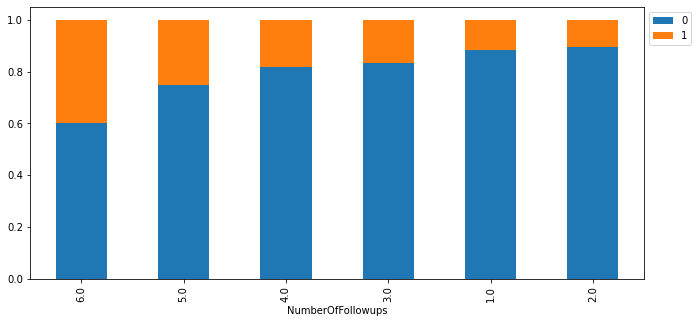

In [65]:
# stacked barplot of NumberOfFollowups and ProdTaken

stacked_barplot(df1, "NumberOfFollowups", "ProdTaken")

 - 4 followups led to the most package purchases.  However, 6 followups led to the highest percentage of customer purchases.
 - Each individual number of followups led to, at a miniumum, 20 package purchases.  
 - The highest percentage of package purchases was 6 followups and the lowest percentage of purchases is 2 followups.

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3926  911  4837
3.0                    2494  480  2974
5.0                     702  249   951
4.0                     730  182   912
------------------------------------------------------------------------------------------------------------------------


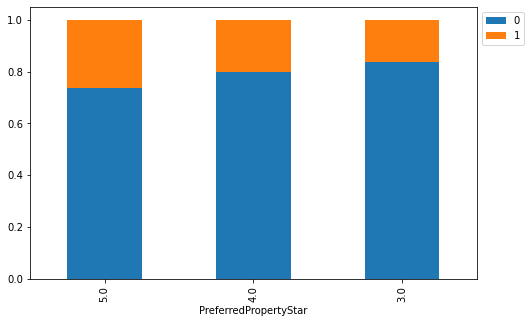

In [66]:
# stacked barplot of PreferredPropertyStar and ProdTaken

stacked_barplot(df1, "PreferredPropertyStar", "ProdTaken")

 - The highest percentage of package purchases preferred 5 star properties, followed by 4 star and, lastly, 3 star.
 - The most package purchases were 3 star properties with 480.

ProdTaken         0    1   All
NumberOfTrips                 
All            3818  905  4723
2.0            1157  299  1456
3.0             859  217  1076
1.0             502  112   614
6.0             257   64   321
5.0             394   62   456
4.0             415   60   475
7.0             156   60   216
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


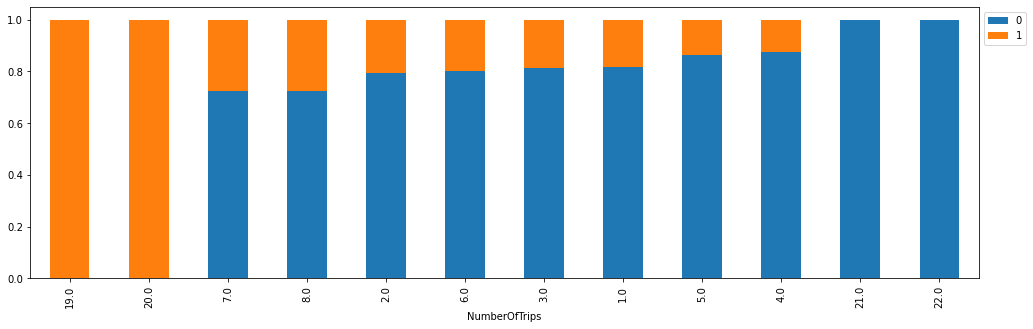

In [67]:
# stacked barplot of NumberOfTrips and ProdTaken

stacked_barplot(df1, "NumberOfTrips", "ProdTaken")

 - The customers who take an average number trips of 19 and 20 per year purchased the package 100% of the time.  It is important to note that only one customer averaged 19 trips and one customer averaged 20 trips.
 - The customers who take an average number trips of 21 and 22 per year refused the package 100% of the time.  However, it is important to note that only one customer took an average of 21 trips per year and one customer took an average of 22 trips per year.
 - A 7 and 8 year trip average renders the highest percentage of package purchases with at least 100 customers.

ProdTaken     0    1   All
Passport                  
All        3946  917  4863
1           928  494  1422
0          3018  423  3441
------------------------------------------------------------------------------------------------------------------------


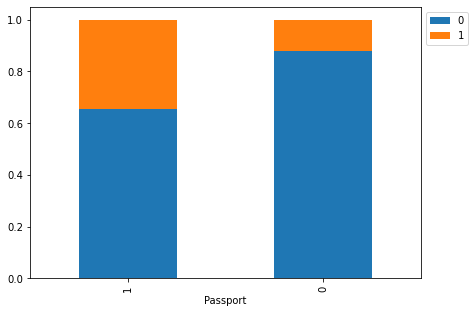

In [68]:
# stacked barplot of Passport and ProdTaken

stacked_barplot(df1, "Passport", "ProdTaken")

 - Customers with a passport are much more likely to purchase the package than customers who do not have passport.

 - 

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3946  917  4863
3                       1152  314  1466
5                        757  210   967
4                        748  162   910
1                        794  143   937
2                        495   88   583
------------------------------------------------------------------------------------------------------------------------


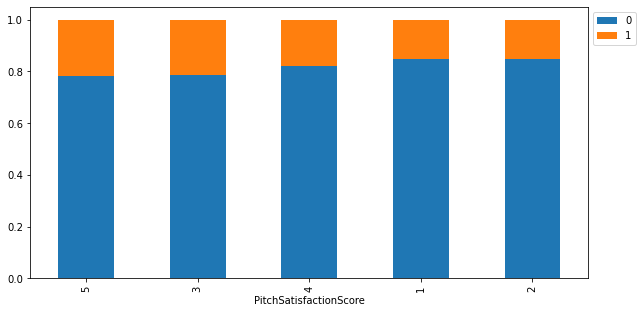

In [69]:
# stacked barplot of PitchSatisfactionScore and ProdTaken

stacked_barplot(df1, "PitchSatisfactionScore", "ProdTaken")

 - In order, the pitch satisfaction scores with the greatest percentage success rate:  5, 3, 4, 1, 2.

ProdTaken     0    1   All
OwnCar                    
All        3946  917  4863
1          2460  558  3018
0          1486  359  1845
------------------------------------------------------------------------------------------------------------------------


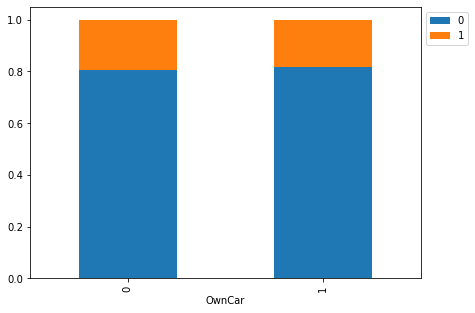

In [70]:
# stacked barplot of OwnCar and ProdTaken

stacked_barplot(df1, "OwnCar", "ProdTaken")

 - Customers who do not own a car are more likely to purchase the package than customers who own cars. However, the margin is minimal.

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3887  910  4797
1.0                       1678  391  2069
2.0                       1080  253  1333
0.0                        870  200  1070
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


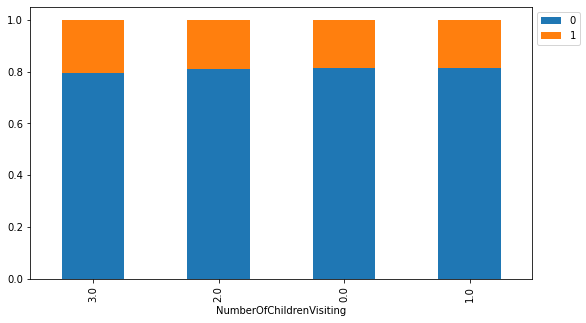

In [71]:
# stacked barplot of NumberOfChildrenVisiting and ProdTaken

stacked_barplot(df1, "NumberOfChildrenVisiting", "ProdTaken")

 - Customers with 3 children visiting are most likely to purchase the package.
 - Customers with 1 child are least likely.
 - Visually, the percentage difference between the 4 value counts is quite possibly negligible.

#### <font color=black>**Stacked Barplot Relating to ProductPitched**</font>

NumberOfPersonVisiting   1     2     3     4  5   All
ProductPitched                                       
All                     39  1401  2394  1026  3  4863
Basic                    9   511   907   404  1  1832
Deluxe                  17   500   844   355  1  1717
Standard                 7   209   363   162  1   742
King                     0    75   115    40  0   230
Super Deluxe             6   106   165    65  0   342
------------------------------------------------------------------------------------------------------------------------


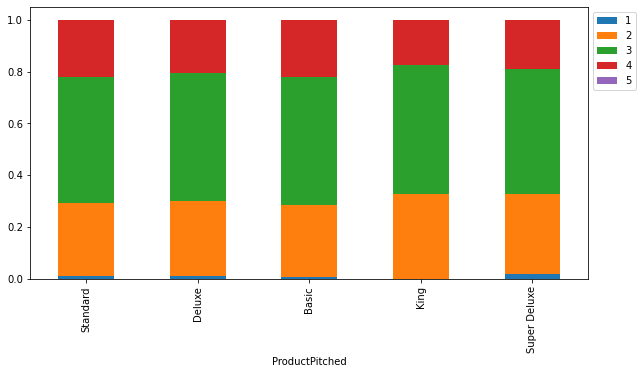

In [72]:
# stacked barplot of ProductPitched and NumberOfPersonVisiting

stacked_barplot(df1, "ProductPitched", "NumberOfPersonVisiting")

 - 3 persons is the most popular number of persons visiting in each package.

OwnCar             0     1   All
ProductPitched                  
All             1845  3018  4863
Basic            756  1076  1832
Deluxe           665  1052  1717
Standard         258   484   742
Super Deluxe     102   240   342
King              64   166   230
------------------------------------------------------------------------------------------------------------------------


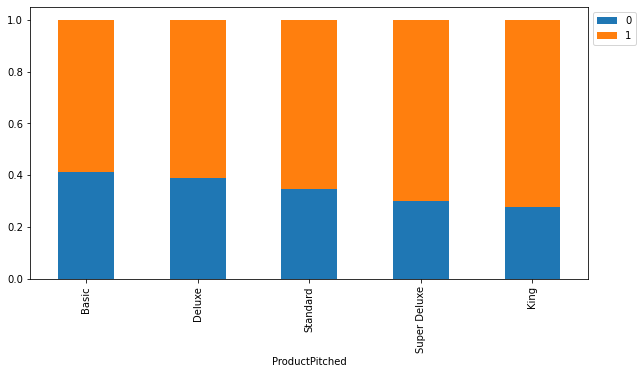

In [73]:
# stacked barplot of ProductPitched and OwnCar

stacked_barplot(df1, "ProductPitched", "OwnCar")

 - Owning a car is an important factor in each product pitched.

NumberOfTrips   1.0   2.0   3.0  4.0  5.0  6.0  7.0  8.0  19.0  20.0  21.0  \
ProductPitched                                                               
Deluxe          231   510   367  184  177  129   79   38     0     0     1   
All             614  1456  1216  475  456  321  216  105     1     1     1   
Basic           212   646   497  119  136  104   75   41     1     1     0   
King             28    35   102   21   21   14    8    1     0     0     0   
Standard        100   205   155   95   83   54   33   17     0     0     0   
Super Deluxe     43    60    95   56   39   20   21    8     0     0     0   

NumberOfTrips   22.0   All  
ProductPitched              
Deluxe             1  1717  
All                1  4863  
Basic              0  1832  
King               0   230  
Standard           0   742  
Super Deluxe       0   342  
------------------------------------------------------------------------------------------------------------------------


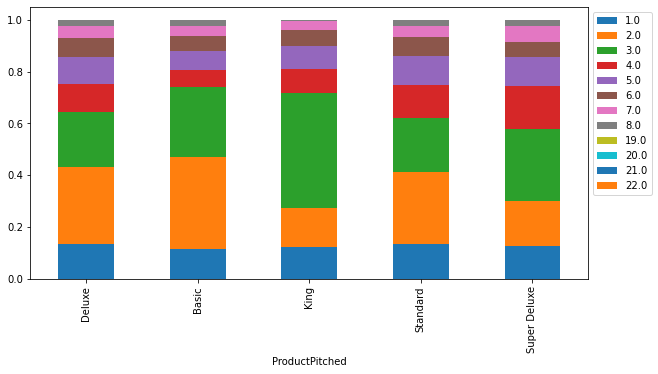

In [74]:
 # stacked barplot of ProductPitched and NumberOfTrips

stacked_barplot(df1, "ProductPitched", "NumberOfTrips")

 - Deluxe, Basic, and Standard packages all include customers who take more trips than King and Super Deluxe packages.

PitchSatisfactionScore    1    2     3    4    5   All
ProductPitched                                        
All                     937  583  1466  910  967  4863
Deluxe                  350  218   542  280  327  1717
Basic                   355  203   548  388  338  1832
Standard                146  102   202  144  148   742
King                     40   34    48   50   58   230
Super Deluxe             46   26   126   48   96   342
------------------------------------------------------------------------------------------------------------------------


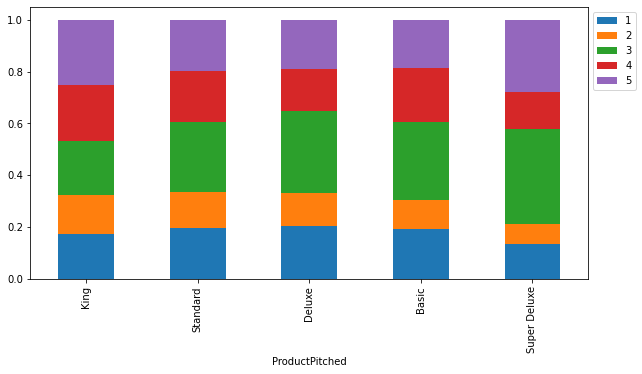

In [75]:
# stacked barplot of ProductPitched and PitchSatisfactionScore

stacked_barplot(df1, "ProductPitched", "PitchSatisfactionScore")

 - The most popular pitch satisfaction score in all packages is a 3 rating.

PreferredPropertyStar   3.0  4.0  5.0   All
ProductPitched                             
All                    3000  912  951  4863
Basic                  1112  368  352  1832
Deluxe                 1079  311  327  1717
Standard                437  130  175   742
Super Deluxe            212   62   68   342
King                    160   41   29   230
------------------------------------------------------------------------------------------------------------------------


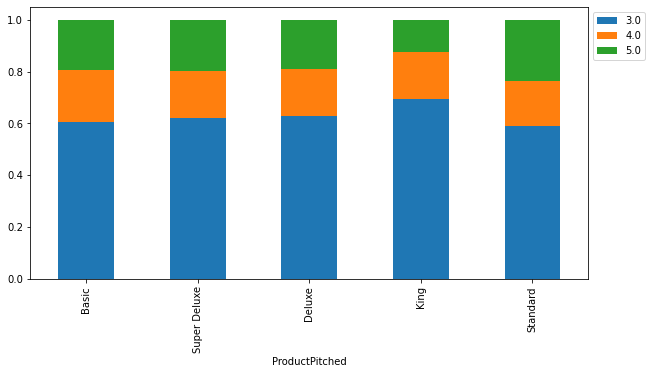

In [76]:
# stacked barplot of ProductPitched and PreferredPropertyStar

stacked_barplot(df1, "ProductPitched", "PreferredPropertyStar")

 - Three star property rating is the most popular rating in all packages.

#### <font color=black>**Boxplot**</font>

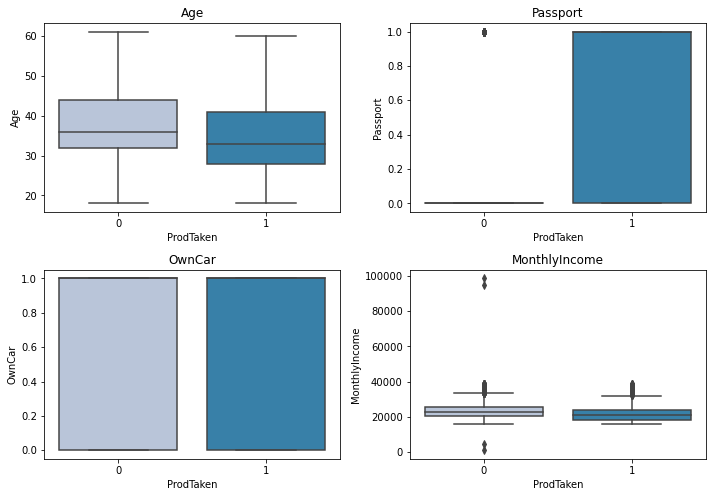

In [77]:
cols = df1[['Age','Passport','OwnCar', 'MonthlyIncome']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df1["ProdTaken"],df1[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

 - Younger age bracket tends to be more likely to purchase the package.
 - Customers with passports are much more likely to purchase the package.  Visually, no passport essentially means no package purchase.
 - Whether or not a customer owns a car is a pretty even distribution and doesnt hold much relevance to package purchase.
 - A slightly lower monthly income leads to more package purchases although the difference is small.

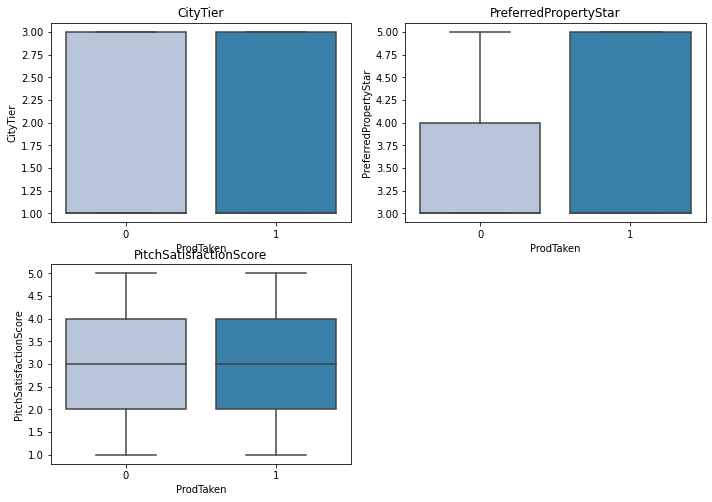

In [78]:
cols = df1[['CityTier','PreferredPropertyStar','PitchSatisfactionScore']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df1["ProdTaken"],df1[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

 - City tier and pitch satisfaction score seem to have pretty even distributions.
 - A customer is more likely to purchase package if property rating is 5 star.

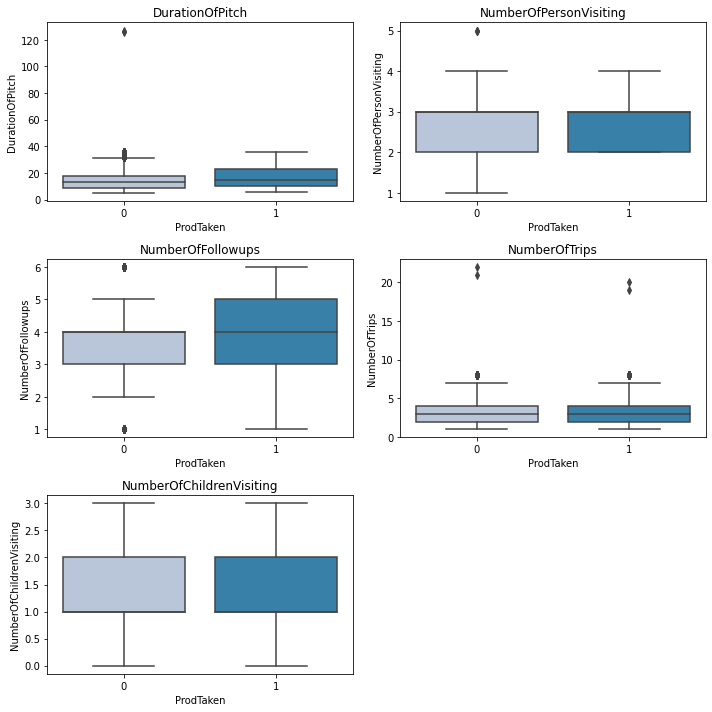

In [79]:
cols = df1[['DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df1["ProdTaken"],df1[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

 - Number of persons visiting and number of children visiting are highly correlated.
 - Duration of pitch, NumberOfFollowups, NumberOfTrips have possible outliers that may need treatment.

## <font color=green>**DATA PRE-PROCESSING CONTINUED**</font>

### <font color=blue>**Outlier Treatment**</font>

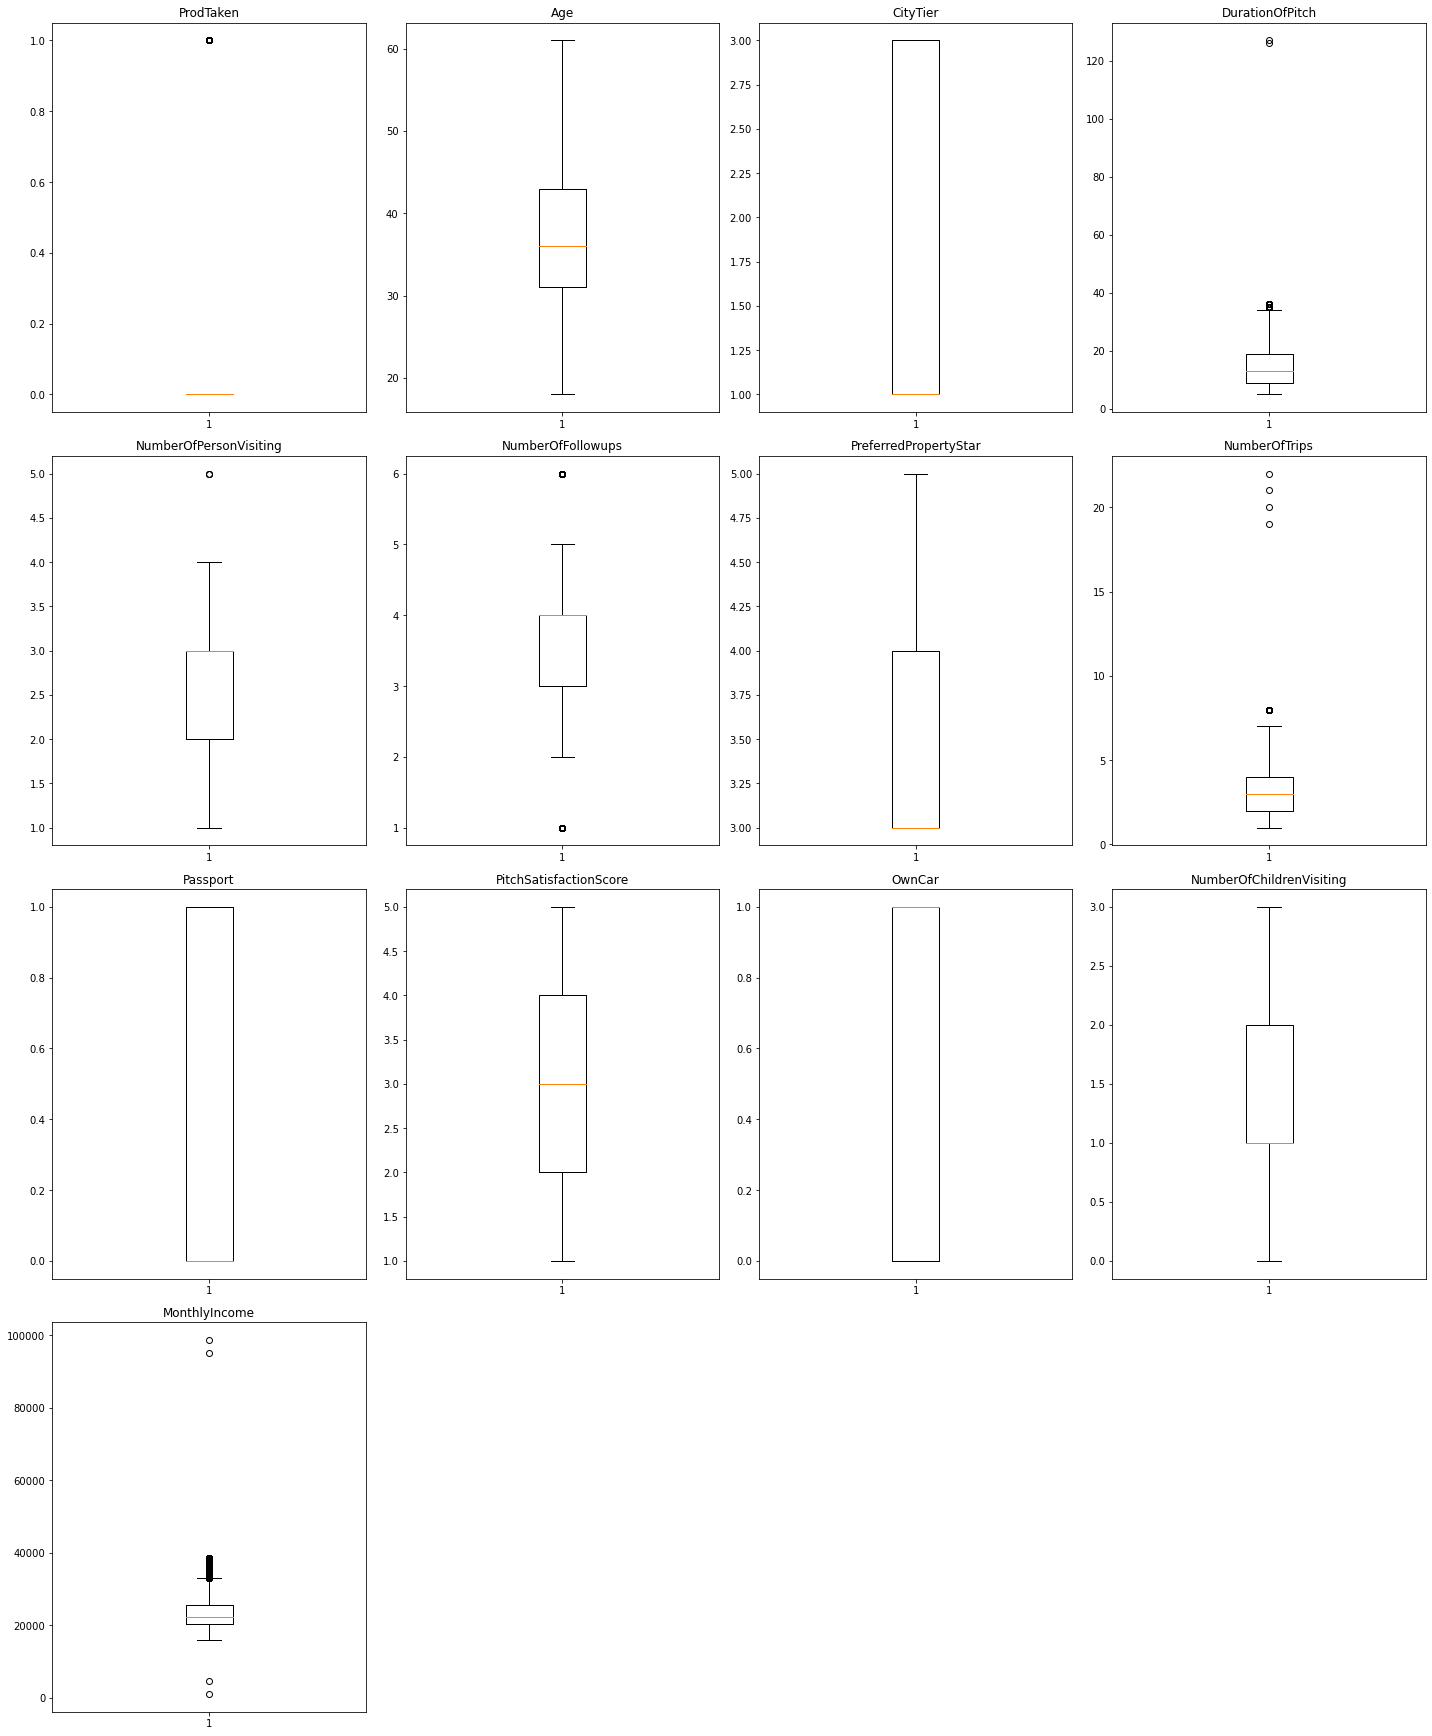

In [80]:
# checking for outliers using boxplot

numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

 - The boxplot shows possible outliers in the following columns:  DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips and Monthly Income.
 - NumberOfPersonVisiting and NumberOfFollowups have minimal value counts so we will not address these possible outliers.
 - DurationOfPitch, NumberOfTrips, and MonthlyIncome deserve a deeper look.

In [81]:
# determine outliers = 4 * iqr median of DurationOfPitch

quartiles = np.quantile(df1["DurationOfPitch"][df1["DurationOfPitch"].notnull()], [0.25, 0.75])
DurationOfPitch_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {DurationOfPitch_4iqr}")

outlier_DurationOfPitch = df1.loc[
    np.abs(df1["DurationOfPitch"] - df1["DurationOfPitch"].median()) > DurationOfPitch_4iqr, "DurationOfPitch"
]
outlier_DurationOfPitch

Q1 = 9.0, Q3 = 19.0, 4*IQR = 40.0


1434    126.0
3878    127.0
Name: DurationOfPitch, dtype: float64

 - Using the 4 * IQR method it's been determined that there are 2 outliers in the DurationOfPitch column.

In [82]:
# dropping outliers in DurationOfPitch

df1.drop(outlier_DurationOfPitch.index, axis=0, inplace=True)

 - Dropping the 2 discovered outliers in the DurationOfPitch column.

In [83]:
# determine outliers = 4 * iqr median of NumberOfTrips

quartiles = np.quantile(df1["NumberOfTrips"][df1["NumberOfTrips"].notnull()], [0.25, 0.75])
NumberOfTrips_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {NumberOfTrips_4iqr}")

outlier_NumberOfTrips = df1.loc[
    np.abs(df1["NumberOfTrips"] - df1["NumberOfTrips"].median()) > DurationOfPitch_4iqr, "NumberOfTrips"
]
outlier_NumberOfTrips

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


Series([], Name: NumberOfTrips, dtype: float64)

- Using the 4 * IQR method it's been determined that there are no outliers in the NumberOfTrips column.

In [84]:
# determine outliers = 4 * iqr median of MonthlyIncome

quartiles = np.quantile(df1["MonthlyIncome"][df1["MonthlyIncome"].notnull()], [0.25, 0.75])
MonthlyIncome_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {MonthlyIncome_4iqr}")

outlier_MonthlyIncome = df1.loc[
    np.abs(df1["MonthlyIncome"] - df1["MonthlyIncome"].median()) > DurationOfPitch_4iqr, "MonthlyIncome"
]
outlier_MonthlyIncome

Q1 = 20410.0, Q3 = 25448.0, 4*IQR = 20152.0


0       20993.0
1       20130.0
2       17090.0
3       17909.0
4       18468.0
         ...   
4883    26576.0
4884    21212.0
4885    31820.0
4886    20289.0
4887    24041.0
Name: MonthlyIncome, Length: 4839, dtype: float64

 - Monthly income has very scattered data so we will leave these outliers unmanipulated.

## <font color=Orange>**Summary of EDA**</font>

### <font color=Brown>**Description of Data:**</font>

 - There are 4888 rows and 20 columns in the dataset.
 - There are object, float and integer value counts in the dataset.
 - There are missing values in the following columns:  Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, and MonthlyIncome.
 - There is no duplicate data.

### <font color=Brown>**Observations:**</font>

 - DurationOfPitch, NumberOfTrips, and MonthlyIncome are right skewed.  The mean is greater than the median.
 - Age and DurationOfPitch may have possible outliers.
 - Data preprocessing will be required on some of the columns.
 - There is a high correlation between "NumberOfPersonVisting" and "NumberOfChildrenVisiting".  As one value increases, so will the other.
 - There is a somewhat high correlation between "MonthlyIncome" and "Age".  As one value increases, so will the other.
 - ProdTaken has postive correlation with the following numerical columns:  CityTier, DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, Passport, PitchSatisfactionScore, and NumberOfChildrenVisiting.  As one value increases, so will the other.
 - ProdTaken is most positively correlated with Passport (0.26).
 - ProdTaken has a negative correlation with Age, OwnCar, and MonthlyIncome.  As one value increases, the other will decrease.
 - ProdTaken is most negatively correlated to Age (-0.14).
 - Younger age bracket tends to be more likely to purchase the package.
 - Customers with passports are much more likely to purchase the package.  Visually, no passport essentially means no package purchase.
 - Whether or not a customer owns a car is a pretty even distribution and doesnt hold much relevance to package purchase.
 - A slightly lower monthly income leads to more package purchases although the difference is small.
 - City tier and pitch satisfaction score seem to have pretty even distributions.
 - A customer is more likely to purchase package if property rating is 5 star.
 - Number of persons visiting and number of children visiting are highly correlated.
 - Duration of pitch, NumberOfFollowups, NumberOfTrips have possible outliers that may need treatment.
 - Customers who do not own a car are more likely to purchase the package than customers who own cars. However, the margin is minimal.
 - Customers with a passport are much more likely to purchase the package than customers who do not have passport.
 - A duration of the sales pitch lasting 9 minutes led to the most package sales. However, there are 404, 9 minute values.  The most of any value count.
 - 126, 127, and 5 minute pitches were rendered ineffective with no package purchases.
 - The top 10 durations leading to package purchase are all under 20 minutes.
 - 4 followups led to the most package purchases.  However, 6 followups led to the highest percentage of customer purchases.
 - Each individual number of followups led to, at a miniumum, 20 package purchases.  
 - The highest percentage of package purchases was 6 followups and the lowest percentage of purchases is 2 followups.
 - The customers who take an average number trips of 19 and 20 per year purchased the package 100% of the time.  It is important to note that only one customer averaged 19 trips and one customer averaged 20 trips.
 - The customers who take an average number trips of 21 and 22 per year refused the package 100% of the time.  However, it is important to note that only one customer took an average of 21 trips per year and one customer took an average of 22 trips per year.
 - A 7 and 8 year trip average renders the highest percentage of package purchases with at least 100 customers.

### <font color=Brown>**Customer Profile:**</font>

 - There are 5 different types of travel packages:  Basic, Deluxe, King, Standard and Super Deluxe.
 - Packages by popularity: Basic - 37.7%, Deluxe - 35.3%, King - 4.7%, Standard - 15.3%, Super Deluxe - 7%.
 - The King package is mostly given a satisfaction score of 4 and 5 by customers.
 - The Standard package is mostly given a satisfaction score of 3 stars by customers.
 - Deluxe, Basic and Super Deluxe packages majority satisfaction score is 3 stars customers. 
 - All packages are comprised of mostly 3 star property score, followed by 4 star and, finally, 5 star.
 - The King package includes the highest percentage of customers who own cars.
 - The highest percentage of number of persons visiting for all packages is 3.
 - The number of trips taken is a greater number for the Deluxe, Basic and Standard Packages then the King and and Super Deluxe packages.

## <font color=green>**MODEL BUILDING**</font>

In [85]:
# dropping dependant variable, creating dummy variables

from sklearn.model_selection import train_test_split

X = df1.drop("ProdTaken", axis=1)  # Predictor feature columns (8 X m)
Y = df1["ProdTaken"]  # Predicted class (1=True, 0=False) (1 X m)


def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


X = encode_cat_vars(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
4787,37.0,1,13.0,3,6.0,3.0,3.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
1163,36.0,1,16.0,3,3.0,4.0,2.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3931,23.0,1,23.0,4,2.0,3.0,3.0,1,3,0,...,0,0,0,0,1,0,1,0,0,0
1542,31.0,1,6.0,2,3.0,4.0,2.0,0,3,1,...,0,0,0,0,0,1,1,0,0,0
546,29.0,3,16.0,2,3.0,3.0,2.0,0,4,0,...,0,0,0,0,0,1,1,0,0,0


In [86]:
# train and test set shape and percentages of classes

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3402, 27)
Shape of test set :  (1459, 27)
Percentage of classes in training set:
0    0.810994
1    0.189006
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.8122
1    0.1878
Name: ProdTaken, dtype: float64


In [87]:
# data splits for train and test

print("{0:0.2f}% data is in training set".format((len(X_train) / len(df1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test) / len(df1.index)) * 100))  #

69.99% data is in training set
30.01% data is in test set


In [88]:
# Original, train and test true and false values

print(
    "Original ProdTaken True Values    : {0} ({1:0.2f}%)".format(
        len(df1.loc[df1["ProdTaken"] == 1]),
        (len(df1.loc[df1["ProdTaken"] == 1]) / len(df1.index)) * 100,
    )
)
print(
    "Original ProdTaken False Values   : {0} ({1:0.2f}%)".format(
        len(df1.loc[df1["ProdTaken"] == 0]),
        (len(df1.loc[df1["ProdTaken"] == 0]) / len(df1.index)) * 100,
    )
)
print("")
print(
    "Training ProdTaken True Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training ProdTaken False Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Test ProdTaken True Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test ProdTaken False Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original ProdTaken True Values    : 917 (18.86%)
Original ProdTaken False Values   : 3944 (81.14%)

Training ProdTaken True Values    : 643 (18.90%)
Training ProdTaken False Values   : 2759 (81.10%)

Test ProdTaken True Values        : 274 (18.78%)
Test ProdTaken False Values       : 1185 (81.22%)



### <font color=blue>**Decision Tree, Random Forest, Bagging**</font>

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [90]:
# defining a function for Confusion Matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### <font color=black>**Decision Tree**</font>

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.925291  0.810219   0.795699  0.802893


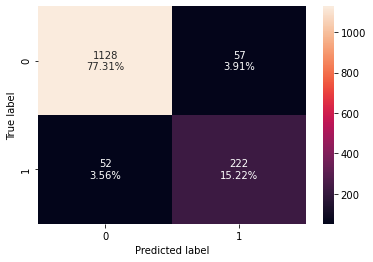

In [91]:
#Fitting the model

d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

 - The decision tree is overfitting the training data.
 - The F1 score is decent at .803

#### <font color=black>**Random Forest**</font>

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.925291  0.638686   0.945946  0.762527


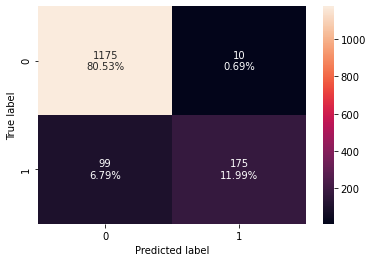

In [92]:
#Fitting the model

rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

 - Random Forest is overfitting the training data.
 - The F1 score is .763 which is lower than the decision tree F1 score.

#### <font color=black>**Bagging**</font>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996179  0.979782        1.0  0.989788
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.929404  0.682482   0.921182  0.784067


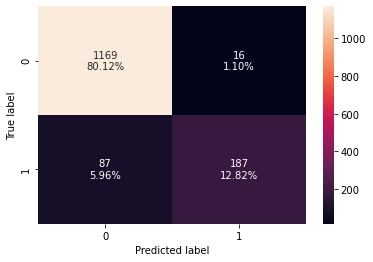

In [93]:
#Fitting the model

bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

 - Bagging is overfitting the training data.
 - The F1 score is .784 which is lower than decision tree but higher than random forest.

#### <font color=black>**Tuning Decision Tree, Random Forest, Bagging**</font>

In [94]:
#Choose the type of classifier. 

dtree_estimator = DecisionTreeClassifier(class_weight={0:0.25,1:0.75},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

- The tuning metrics used for decision tree are max_depth, min_samples_leaf, max_leaf_nodes, min_impurity_decrease.
- Tuning Metrics Defined:
  - max_depth - the max depth of the decision tree
  - min_samples_leaf - determines the split point in relation to depth of tree.
  - max_leaf_nodes - measures the quality of the split.
  - min_impurity_decrease - node will be split if this split induces a decrease of the impurity greater than or equal to this value.

Training performance:
    Accuracy    Recall  Precision        F1
0  0.765138  0.657854   0.422156  0.514286
Testing performance:
    Accuracy    Recall  Precision       F1
0   0.76148  0.594891     0.4075  0.48368


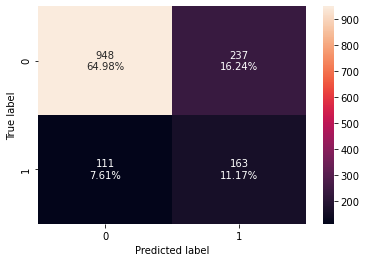

In [95]:
#Calculating different metrics

dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

 - The overfitting has reduced.
 - The F1 score has dropped to .484 on the testing data.

In [96]:
# Choose the type of classifier. 

rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

- The tuning metrics used for random forest are n_estimators, min_samples_leaf, max_features and max_samples.
- Tuning metrics Defined:
  - n_estimators - Number of trees built before taking the maximum voting or averages.
  - min_samples_leaf - split point in relation to depth of tree.
  - max_features - maximum number of features to try in each individual tree.
  - max_samples - maximum number of samples that trains each tree.

Training performance:
    Accuracy    Recall  Precision        F1
0  0.918577  0.608087   0.939904  0.738432
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.879369  0.430657   0.855072  0.572816


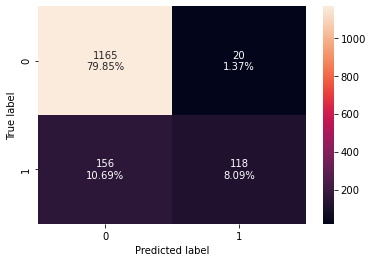

In [97]:
#Calculating different metrics

rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

 - The overfitting has reduced.
 - The F1 score has dropped to .573 on the testing data.

In [98]:
# Choose the type of classifier. 

bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

- The tuning metrics used for bagging are max_samples, max_features, n_estimators.
- Tuning metrics defined:
  - max_samples - maximum number of samples used to train each tree.
  - max_features - maximum numbers of features used on each individual tree.
  - n_estimators - number of trees built before taking the maximum voting or averages.

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999118  0.995334        1.0  0.997662
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.935572  0.708029   0.932692  0.804979


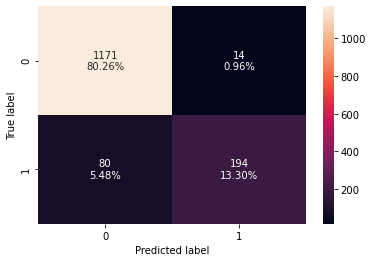

In [99]:
#Calculating different metrics

bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

 - The overfitting has reduced slightly.
 - The F1 score has improved to .805.

 #### <font color=black>**Comparing the Models**</font>

In [100]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,1.0,0.765138,1.0,0.918577,0.996179,0.999118
Recall,1.0,0.657854,1.0,0.608087,0.979782,0.995334
Precision,1.0,0.422156,1.0,0.939904,1.000000,1.000000
F1,1.0,0.514286,1.0,0.738432,0.989788,0.997662


In [101]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned
Accuracy,0.925291,0.761480,0.925291,0.879369,0.929404,0.935572
Recall,0.810219,0.594891,0.638686,0.430657,0.682482,0.708029
Precision,0.795699,0.407500,0.945946,0.855072,0.921182,0.932692
F1,0.802893,0.483680,0.762527,0.572816,0.784067,0.804979


- The majority of the models are overfitting the training data in terms of f1-score.
- The bagging classifier estimated tuned is giving the highest f1-score on the test data but is overfitting the training data.
- The decision tree is giving the second highest F1 score and is more generalized that the bagging estimator tuned.
- Decision tree estimator is giving the lowest F1 score, .484.
- The random forest estimator is has a better f1 score than the random forest tuned.

 #### <font color=black>**Feature Importance of rf_estimator**</font>

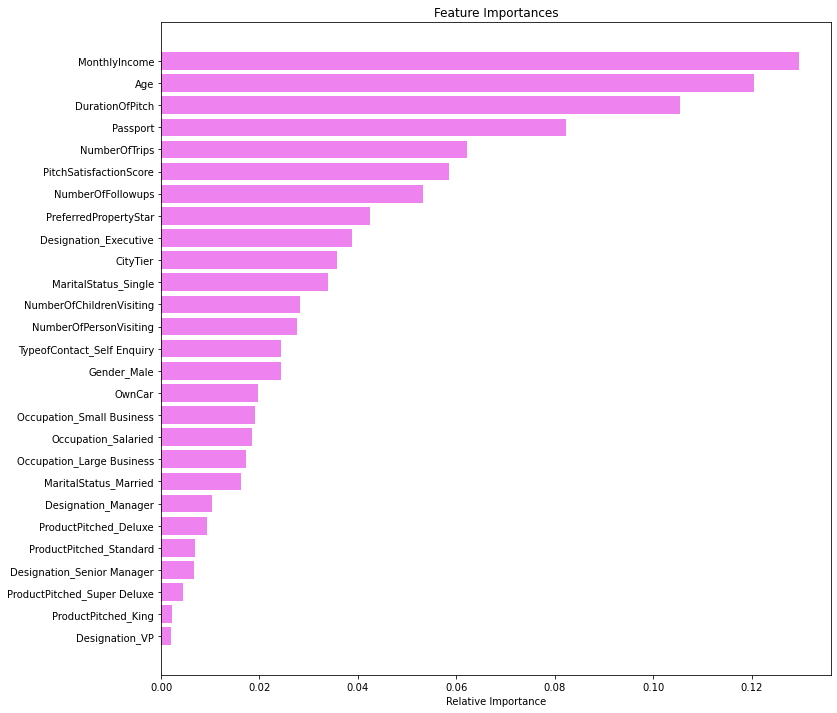

In [102]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The top five features in the random forest estimator are, in order, MonthlyIncome, Age, DurationOfPitch, Passport, and NumberOfTrips.
- The bottom five features in the random forest estimator are, in order, Designation_VP, ProductPitched_King, ProductPitched_Super Deluxe, Designation_Senior Manager, and ProductPitched_Standard.

### <font color=blue>**AdaBoost, Gradient Boost, XGBoost, Stacking**</font>

#### <font color=black>**AdaBoost**</font>

   Accuracy    Recall  Precision        F1
0  0.854791  0.390358   0.711048  0.504016
   Accuracy    Recall  Precision        F1
0  0.847156  0.332117   0.694656  0.449383


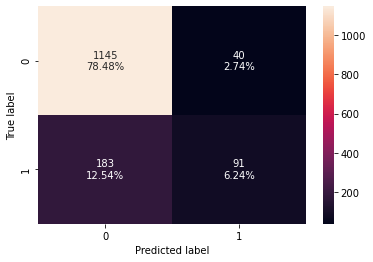

In [103]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

- Adaboost is giving more generalized performance than previous models but the test f1-score is too low.

#### <font color=black>**AdaBoost Tuned**</font>

In [104]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=1)

- The tuning metrics used for AdaBoost are base_estimator, n_estimator, and learning_rate.
- Tuning metrics defined:
  - base_estimator - weak learner used to train the model.
  - n_estimator - number of trees built before taking the maximum voting or averages.
  - learning_rate - contribution of each model to the weights and defaults to 1.

   Accuracy    Recall  Precision        F1
0  0.990888  0.954899   0.996753  0.975377
   Accuracy    Recall  Precision        F1
0  0.885538  0.613139   0.733624  0.667992


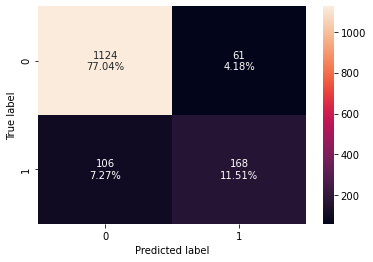

In [105]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

- The F1 score has increased.
- The model is overfitting the data.

#### <font color=black>**Gradient Boost**</font>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.890947  0.502333   0.863636  0.635202
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.866347  0.383212   0.801527  0.518519


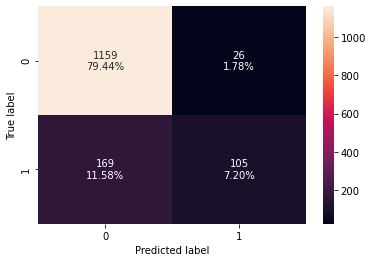

In [106]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

- The model is overfitting but more generalized than most previous models.
- Recall score is low at .383.
- The F1 score is low at .519.

#### <font color=black>**Gradient Boost Tuned**</font>

In [107]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

- The tuning metrics used for Gradient Boost are n_estimators, subsample and max_features.
- Tuning metrics defined:
  - n_estimators - number of trees built before taking the maximum voting or averages.
  - subsample - The fraction of samples to be used for fitting.
  - max_features - maximum numbers of features used on each individual tree.

Training performance:
    Accuracy    Recall  Precision       F1
0  0.925338  0.659409   0.923747  0.76951
Testing performance:
    Accuracy   Recall  Precision       F1
0  0.877999  0.50365   0.766667  0.60793


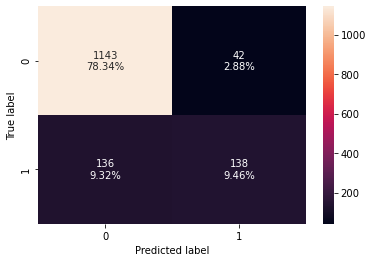

In [108]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

- The model is slightly more overfitting after the tuning.
- The F1 score has increased to .608.

#### <font color=black>**XGBoost**</font>

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.939685  0.759124   0.904348  0.825397


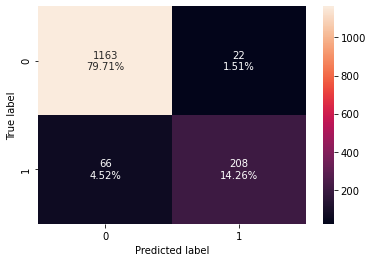

In [109]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

- The model is overfitting the data.
- The F1 score is the highest yet, .825.

#### <font color=black>**XGBoost Tuned**</font>

In [110]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

- The tuning metrics used for XGBoost are n_estimators, scale_pos_weight, subsample, learning_rate, colsample_bytree, and colsample_bylevel.
- Defining the metrics:
  - n_estimators - number of trees built before taking the maximum voting or averages.
  - scale_pos_weight - the ratio of the number of negative class to the positive class.
  - subsample - The fraction of samples to be used for fitting.
  - learning_rate - contribution of each model to the weights and defaults to 1.
  - colsample_bytree - subsample ratio of columns when constructing each tree.
  - colsample_bylevel - fraction of features used in each node to train the tree.

Training performance:
    Accuracy   Recall  Precision        F1
0  0.983833  0.99689   0.923631  0.958863
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.925291  0.857664   0.770492  0.811744


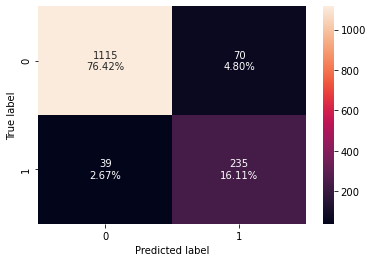

In [111]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

- The tuned model has reduced overfitting.
- The F1 score has decreased slightly to .812.

#### <font color=black>**Stacking**</font>

In [112]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=150,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tr...
                                                 

Training performance:
    Accuracy    Recall  Precision        F1
0  0.923574  0.934681   0.733822  0.822161
Testing performance:
    Accuracy   Recall  Precision       F1
0   0.86292  0.79927   0.601648  0.68652


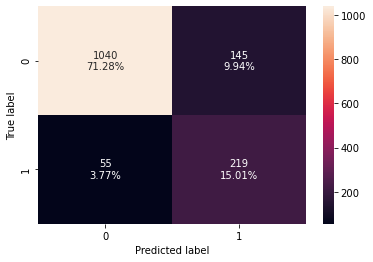

In [113]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

- The model is overfitting the data.
- The F1 score is low at .687.

#### <font color=black>**Model Comparison**</font>

In [114]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.765138,1.0,0.918577,0.996179,0.999118,0.854791,0.990888,0.890947,0.925338,1.0,0.983833,0.923574
Recall,1.0,0.657854,1.0,0.608087,0.979782,0.995334,0.390358,0.954899,0.502333,0.659409,1.0,0.996890,0.934681
Precision,1.0,0.422156,1.0,0.939904,1.000000,1.000000,0.711048,0.996753,0.863636,0.923747,1.0,0.923631,0.733822
F1,1.0,0.514286,1.0,0.738432,0.989788,0.997662,0.504016,0.975377,0.635202,0.769510,1.0,0.958863,0.822161


In [115]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.925291,0.761480,0.925291,0.879369,0.929404,0.935572,0.847156,0.885538,0.866347,0.877999,0.939685,0.925291,0.862920
Recall,0.810219,0.594891,0.638686,0.430657,0.682482,0.708029,0.332117,0.613139,0.383212,0.503650,0.759124,0.857664,0.799270
Precision,0.795699,0.407500,0.945946,0.855072,0.921182,0.932692,0.694656,0.733624,0.801527,0.766667,0.904348,0.770492,0.601648
F1,0.802893,0.483680,0.762527,0.572816,0.784067,0.804979,0.449383,0.667992,0.518519,0.607930,0.825397,0.811744,0.686520


- The majority of models are overfitting the trained data in terms of F1 score.
- XGBoost and XGBoost tuned give us the highest F1 scores, .825 and .813 respectively.
- Bagging estimator tuned and Decision Tree are also providing decent F1 scores, .805 and .803 respectively.
- Decision tree estimator, random forest tuned, adaboost classifier, and gradient boost classifier all have low F1 scores.
- XGBoost classifier has the highest accuracy score, .94.  Decision treee estimator the lowest at .761.
- XGClassifier tuned has the highest recall score, .86.  Adaboost classifier has the lowest at .332.
- Random forest estimator has the highest precision score, .946.  Decision tree estimator has the lowest at .41.

### <font color=blue>**Feature Importance**</font>

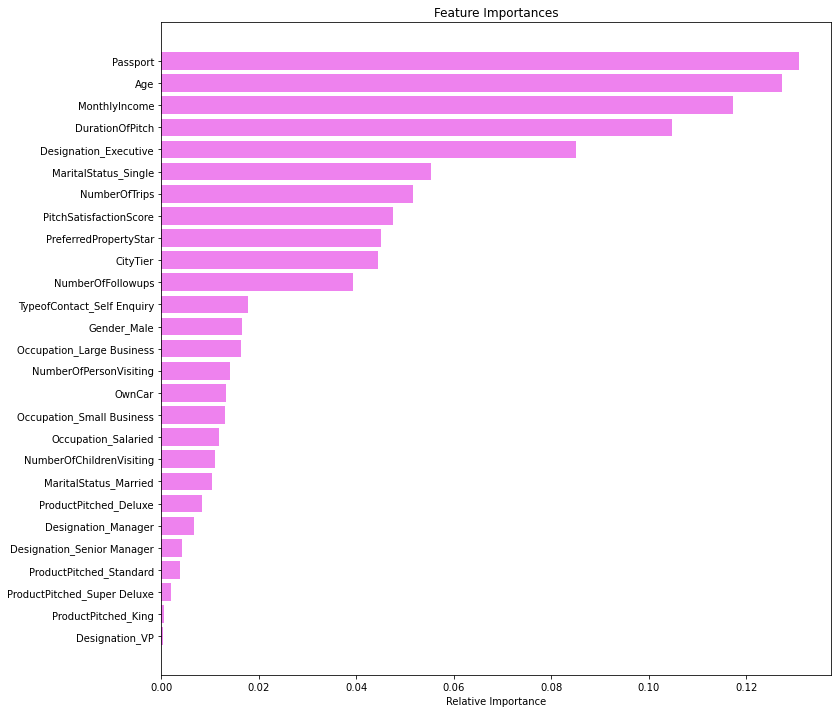

In [116]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')
plt.show()

- The top five features in the rf tuned model is Passport, Age, MonthlyIncome, DurationOfPitch, and Designation_Executive.
- The bottom five features are Designation_VP, ProductPitched_King, ProductPitched_Super Deluxe, ProductPitched_Standard, and Designation_Senior Manager.

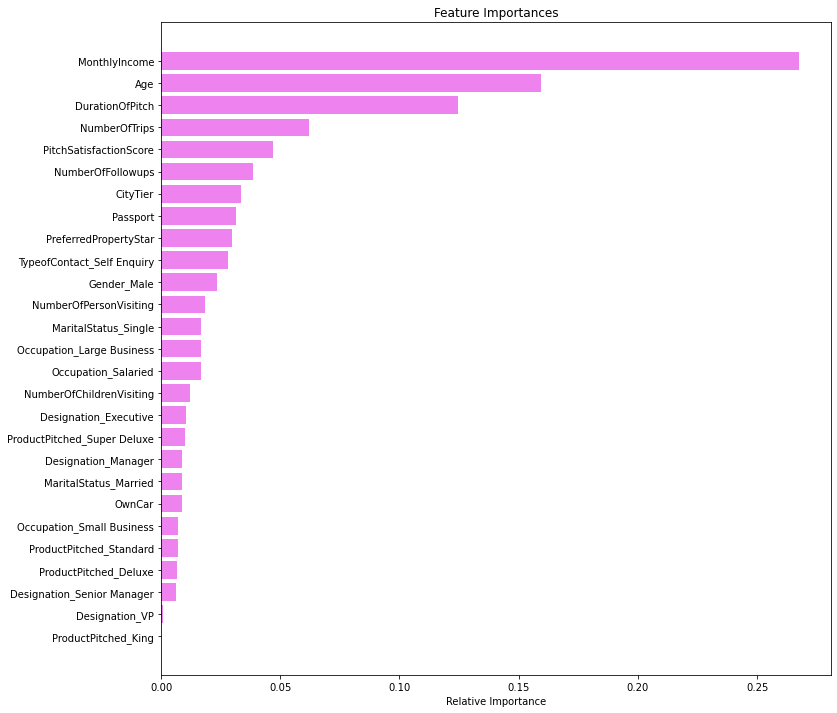

In [117]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The top five features of importance in the adaboost tuned model are MonthlyIncome, Age, DurationOfPitch, NumberOfTrips, and PitchSatisfactionScore.
- The bottom five features of importace are ProductPitched_King, Designation_VP, Designation_Senior Manager, ProductPitched_Deluxe, ProductPitched_Standard.

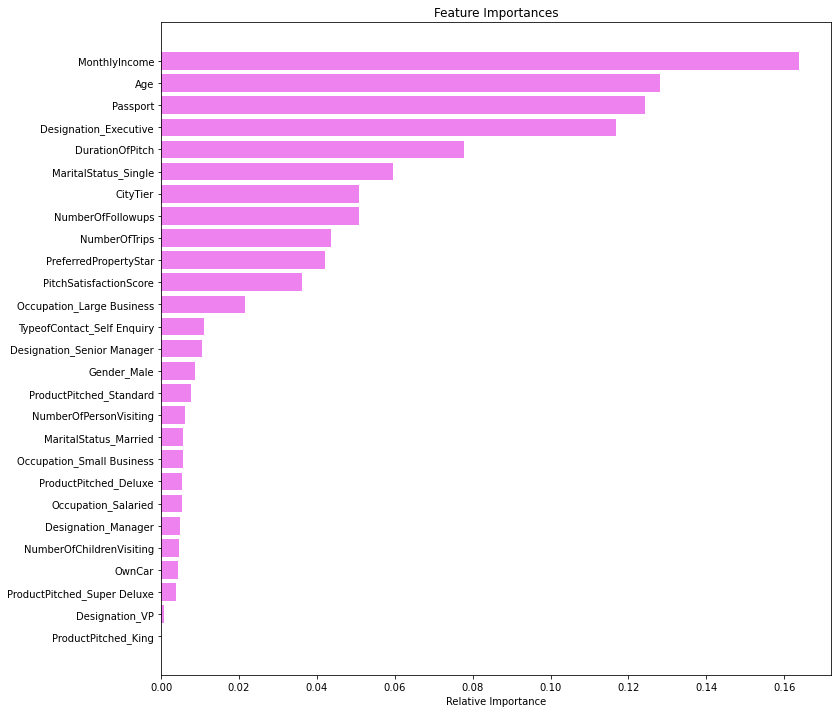

In [118]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The top five features of importance in the gradient boost tuned model are MonthlyIncome, Age, Passport, Designation_Executive, DurationOfPitch.
- the bottom five features of importance are ProductPitched_King, Designation_VP, ProductPitched_Super Deluxe, OwnCar, and NumberOfChildrenVisiting.

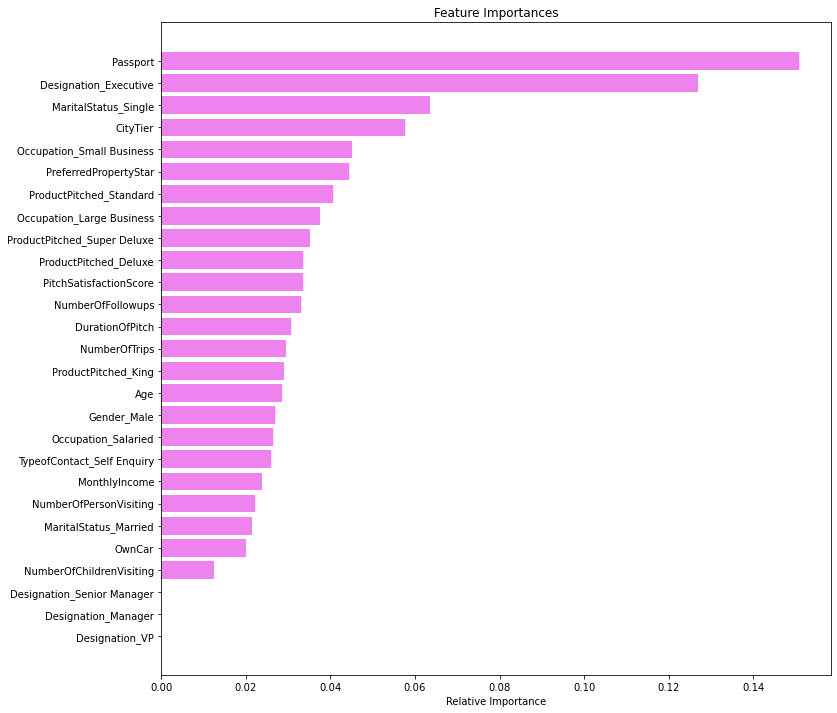

In [119]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The top five features of importance in the XGBoost tuned model are Passport, Designation_Executive, MaritalStatus_Single, CityTier, and Occupation_Small Business.
- The bottom five features of importance are Designation_VP, Designation_Manager, Designation_Senior Manager, NumberOfChildrenVisiting, and OwnCar.

## <font color=Orange>**Conclusion**</font>

### <font color=Brown>**Actionable Insights**</font>

#### <font color=violet>**Comparing Decision Tree, Random Forest and Bagging Models**</font>

- The majority of the models are overfitting the training data in terms of f1-score.
- The bagging classifier estimated tuned is giving the highest f1-score on the test data but is overfitting the training data.
- The decision tree is giving the second highest F1 score and is more generalized that the bagging estimator tuned.
- Decision tree estimator is giving the lowest F1 score, .484.
- The random forest estimator is has a better f1 score than the random forest tuned.

#### <font color=violet>**Comparing AdaBoost, Gradient Boost, XGBoost, and Stacking Models**</font>

- The majority of models are overfitting the trained data in terms of F1 score.
- XGBoost and XGBoost tuned give us the highest F1 scores, .825 and .813 respectively.
- Bagging estimator tuned and Decision Tree are also providing decent F1 scores, .805 and .803 respectively.
- Decision tree estimator, random forest tuned, adaboost classifier, and gradient boost classifier all have low F1 scores.
- XGBoost classifier has the highest accuracy score, .94.  Decision treee estimator the lowest at .761.
- XGClassifier tuned has the highest recall score, .86.  Adaboost classifier has the lowest at .332.
- Random forest estimator has the highest precision score, .946.  Decision tree estimator has the lowest at .41.

### <font color=Brown>**Recommedations**</font>

#### <font color=violet>**Feature Importance**</font>

- The top five features in the rf tuned model is Passport, Age, MonthlyIncome, DurationOfPitch, and Designation_Executive.
- The bottom five features are Designation_VP, ProductPitched_King, ProductPitched_Super Deluxe, ProductPitched_Standard, and Designation_Senior Manager.
- The top five features of importance in the adaboost tuned model are MonthlyIncome, Age, DurationOfPitch, NumberOfTrips, and PitchSatisfactionScore.
- The bottom five features of importace are ProductPitched_King, Designation_VP, Designation_Senior Manager, ProductPitched_Deluxe, ProductPitched_Standard.
- The top five features of importance in the gradient boost tuned model are MonthlyIncome, Age, Passport, Designation_Executive, DurationOfPitch.
- the bottom five features of importance are ProductPitched_King, Designation_VP, ProductPitched_Super Deluxe, OwnCar, and NumberOfChildrenVisiting.
- The top five features of importance in the XGBoost tuned model are Passport, Designation_Executive, MaritalStatus_Single, CityTier, and Occupation_Small Business.
- The bottom five features of importance are Designation_VP, Designation_Manager, Designation_Senior Manager, NumberOfChildrenVisiting, and OwnCar.

#### <font color=violet>**Advice to Grow Business**</font>

- XGBoost tuned has provided us the best F1 score.
- The two most important features where the business should direct its focus are if the customer has a passport and if the customer is designated an executive.
- If a customer is single, also has significant importance in purchasing a travel package.
- ProdTaken has postive correlation with the following numerical columns:  CityTier, DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, Passport, PitchSatisfactionScore, and NumberOfChildrenVisiting.  As one value increases, so will the other.
- ProdTaken is most positively correlated with Passport (0.26).
- ProdTaken has a negative correlation with Age, OwnCar, and MonthlyIncome.  As one value increases, the other will decrease.
- ProdTaken is most negatively correlated to Age (-0.14).

#### <font color=red>**Created by Stephen Catalfio**</font>